<a href="https://colab.research.google.com/github/kandelprakashchandra/vis/blob/main/PS3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PS3
**Prakash Kandel**

**Course: 56:834:653:01 DATA VISUALIZATION**

**Spring 2023**

**Instructor: Adam Okulicz-Kozaryn**

**The Impact of 2009 Recession across Countries around the World Based on their Socio-Economic Statuses**



Since the dawn of the new millenium, the United Nations launched two important programs viz. Millenium Development Goals (2000-2015) and Sustainable Development Goals (2016-2030). These programs are supposed to improve socio-economic and political conditions around teh world. In addition, other multilateral organization have been professing to work for reducing poverty and inequality around the world. In light of thes eimportant initiaitiives, it becomes crucial to see if there have been positive improvements in politcal, economic, and social conditions of people. The following research aim to answer those questions:

1. Has there any been any significant change in economic growth? Has it varied across countries cateogorized by income categories and regions?

2. Have people become more or less happy across the countries, regions, and income levels in the new millenium ?

3. How have the world governance indicators fared by income categories and regions?

4. Has there any been significant  change in world inequality? Has it varied across countires cateogorized by income categories and regions?

aok: then loop back to these questions in vis--try to answer them

Sources:

<a href="https://www.imf.org/en/Publications/fandd/issues/Series/Back-to-Basics/Recession"> Recession (IMF)</a>


In [1]:
from statistics import *
import pylab as plt
import pandas as pd
import pandas_datareader as pdr
import datetime
from pandas_datareader import wb
import sys
import os 
import re
import urllib  
from urllib.request import urlopen                                                
import string 
                                                                          
import webbrowser                                                                      
import folium as f                                                                     
from folium.plugins import MarkerCluster, HeatMap                                      

import json

import numpy as np

from google.colab import drive

import openpyxl
from pathlib import Path

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import requests

import zipfile # for unzipping Zipped Files
from io import BytesIO #Byte IO function to  read the contents of the zip file into memory

import pandas_datareader.data as web

import matplotlib.pyplot as plt

import seaborn as sns

# WORLD GOVERNANCE INDICATORS (WGI):

As per The World Bank, governance consists "the traditions and institutions by which authority in a country is exercised.  This includes the process by which governments are selected, monitored and replaced; the capacity of the government to effectively formulate and implement sound policies; and the respect of citizens and the state for the institutions that govern economic and social interactions among them."


The World Bank hase been producing world governance reports annually since 1996 to gauge the governance situations in almost all the countires across the globe. It condsiders six composite indicators related to governance which are as follows:
1. Voice and Accountability,
2. Political Stability and Absence of Violence/Terrorism, 
3. Government Effectiveness,
4. Regulatory Quality,
5. Rule of Law, and 
6. Control of Corruption

The data are based on "the views of a large number of enterprise, citizen and expert survey respondents in industrial and developing countries".

Sources:

<a href="https://info.worldbank.org/governance/wgi/"> Worldwide Governance Indicators </a>

<a href="https://info.worldbank.org/governance/wgi/pdf/WGI.pdf"> The Worldwide Governance Indicators: Methodology and Analytical Issues  </a>



In [2]:
# Extraction of World Governance Indicators directly from the Website

url = "https://info.worldbank.org/governance/wgi/Home/downLoadFile?fileName=wgidataset_stata.zip"
r = requests.get(url)
z = zipfile.ZipFile(BytesIO(r.content)) # for unzipping the zipped STATA File

govindic = pd.read_stata(z.open("wgidataset.dta"))

labels = pd.read_stata(z.open("wgidataset.dta"), iterator=True) #reading labels
labels.variable_labels()

govindic.head()

{'code': 'code',
 'countryname': 'countryname',
 'year': '',
 'vae': 'Voice and Accountability, Estimate',
 'vas': 'Voice and Accountability, Standard Error',
 'van': 'Voice and Accountability, Number of Sources',
 'var': 'Voice and Accountability, Percentile Rank (0-100)',
 'val': 'Voice and Accountability, Percentile Rank of Lower Bound of 90% Confidence Inter',
 'vau': 'Voice and Accountability, Percentile Rank of Upper Bound of 90% Confidence Inter',
 'pve': 'Political Stability and Absence of Violence/Terrorism, Estimate',
 'pvs': 'Political Stability and Absence of Violence/Terrorism, Standard Error',
 'pvn': 'Political Stability and Absence of Violence/Terrorism, Number of Sources',
 'pvr': 'Political Stability and Absence of Violence/Terrorism, Percentile Rank (0-100)',
 'pvl': 'Political Stability and Absence of Violence/Terrorism, Percentile Rank of Lower ',
 'pvu': 'Political Stability and Absence of Violence/Terrorism, Percentile Rank of Upper ',
 'gee': 'Government Effecti

,code,countryname,year,vae,vas,van,var,val,vau,pve,...,rln,rlr,rll,rlu,cce,ccs,ccn,ccr,ccl,ccu
0,ABW,Aruba,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
govindic.tail(20) # inspecting data to enusre there is no unwanted data at the end

,code,countryname,year,vae,vas,van,var,val,vau,pve,...,rln,rlr,rll,rlu,cce,ccs,ccn,ccr,ccl,ccu
4902,ZWE,Zimbabwe,2002,-1.363361,0.156958,11.0,10.945273,5.472637,15.920398,-1.515870,...,10.0,3.482587,0.000000,8.457711,-1.156760,0.189122,6.0,7.407407,0.529101,23.809525
4903,ZWE,Zimbabwe,2003,-1.431192,0.148406,12.0,9.950249,3.980099,12.935324,-1.087581,...,11.0,2.487562,0.000000,8.457711,-1.188868,0.185884,8.0,6.878307,1.058201,21.164021
4904,ZWE,Zimbabwe,2004,-1.553577,0.144486,13.0,6.250000,2.403846,10.096154,-1.204704,...,13.0,2.884615,0.000000,6.730769,-1.253563,0.168878,10.0,8.866995,0.985222,17.733990
4905,ZWE,Zimbabwe,2005,-1.674941,0.139619,14.0,5.288462,1.923077,8.173077,-1.267644,...,14.0,0.478469,0.000000,3.349282,-1.314617,0.165643,11.0,7.317073,0.000000,15.609756
4906,ZWE,Zimbabwe,2006,-1.539244,0.110492,17.0,7.211538,6.730769,8.653846,-0.931996,...,17.0,0.956938,0.000000,3.827751,-1.372949,0.149107,14.0,4.390244,0.487805,10.243902
4907,ZWE,Zimbabwe,2007,-1.571521,0.112105,17.0,7.211538,4.326923,8.653846,-1.110345,...,17.0,1.435407,0.000000,1.913876,-1.404758,0.155571,14.0,2.912621,0.000000,10.679611
4908,ZWE,Zimbabwe,2008,-1.549031,0.109917,17.0,7.692307,4.326923,9.615385,-1.212338,...,17.0,0.961538,0.000000,2.884615,-1.348838,0.152072,14.0,3.883495,0.970874,12.621359
4909,ZWE,Zimbabwe,2009,-1.539210,0.111639,17.0,7.582938,3.791469,9.952606,-1.167181,...,17.0,0.947867,0.000000,1.421801,-1.357875,0.154961,14.0,3.349282,0.478469,11.961722
4910,ZWE,Zimbabwe,2010,-1.475182,0.110218,17.0,8.056872,5.687204,12.796208,-1.104014,...,17.0,0.947867,0.000000,2.369668,-1.373287,0.150240,15.0,2.857143,0.952381,12.380953
4911,ZWE,Zimbabwe,2011,-1.463763,0.110784,18.0,7.981221,5.164319,12.676056,-0.945329,...,17.0,0.938967,0.000000,1.877934,-1.425627,0.149206,15.0,2.369668,0.000000,10.900474


In [4]:
govindic.columns # inspecting the var names

Index(['code', 'countryname', 'year', 'vae', 'vas', 'van', 'var', 'val', 'vau',
       'pve', 'pvs', 'pvn', 'pvr', 'pvl', 'pvu', 'gee', 'ges', 'gen', 'ger',
       'gel', 'geu', 'rqe', 'rqs', 'rqn', 'rqr', 'rql', 'rqu', 'rle', 'rls',
       'rln', 'rlr', 'rll', 'rlu', 'cce', 'ccs', 'ccn', 'ccr', 'ccl', 'ccu'],
      dtype='object')

In [5]:
govindic.info() #data types of variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4922 entries, 0 to 4921
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   code         4922 non-null   object 
 1   countryname  4922 non-null   object 
 2   year         4922 non-null   int16  
 3   vae          4768 non-null   float32
 4   vas          4768 non-null   float32
 5   van          4768 non-null   float32
 6   var          4768 non-null   float32
 7   val          4768 non-null   float32
 8   vau          4768 non-null   float32
 9   pve          4753 non-null   float32
 10  pvs          4753 non-null   float32
 11  pvn          4753 non-null   float32
 12  pvr          4753 non-null   float32
 13  pvl          4753 non-null   float32
 14  pvu          4753 non-null   float32
 15  gee          4679 non-null   float32
 16  ges          4679 non-null   float32
 17  gen          4679 non-null   float32
 18  ger          4679 non-null   float32
 19  gel   

In [6]:
govindic.describe() # descriptive statistics of the variables

,year,vae,vas,van,var,val,vau,pve,pvs,pvn,...,rln,rlr,rll,rlu,cce,ccs,ccn,ccr,ccl,ccu
count,4922.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4753.000000,4753.000000,4753.000000,...,4793.000000,4793.000000,4793.000000,4793.000000,4.703000e+03,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000
mean,2009.739130,0.000000,0.174118,9.401846,50.016102,41.539654,57.810894,0.000000,0.284441,5.425626,...,9.409347,50.051483,40.050411,59.126564,-6.488960e-09,0.210343,7.998937,50.051537,39.611240,59.533039
std,7.066972,0.997690,0.080265,4.448198,29.027012,26.720179,30.591827,0.997683,0.082418,2.283097,...,4.405445,29.058060,28.514313,28.658710,9.976578e-01,0.101687,4.155859,29.066736,29.945717,27.025034
min,1996.000000,-2.313395,0.103448,1.000000,0.000000,0.000000,0.966184,-3.312951,0.192247,1.000000,...,1.000000,0.000000,0.000000,0.000000,-1.916457e+00,0.114779,1.000000,0.000000,0.000000,1.904762
25%,2004.000000,-0.820271,0.127144,6.000000,24.882629,16.826923,30.516432,-0.643627,0.231508,4.000000,...,6.000000,24.882629,13.942307,36.492889,-7.733018e-01,0.147936,4.000000,24.879215,12.500000,38.442593
50%,2010.000000,0.052558,0.144501,10.000000,50.000000,40.384617,57.211540,0.110401,0.254975,6.000000,...,10.000000,50.000000,37.980770,58.373207,-2.253539e-01,0.174068,8.000000,50.000000,34.615383,60.189575
75%,2016.000000,0.911884,0.203310,13.000000,75.119125,64.532021,88.888885,0.853993,0.316001,7.000000,...,13.000000,75.961540,62.085308,86.538460,7.416013e-01,0.232341,11.000000,75.480766,64.903847,83.023758
max,2021.000000,1.800992,0.893413,20.000000,100.000000,97.584541,100.000000,1.965062,0.733391,10.000000,...,18.000000,100.000000,97.115387,100.000000,2.459118e+00,0.991055,16.000000,100.000000,97.630333,100.000000


In [7]:
columns_to_keep = ['code', 'countryname', 'year', 'vae', 'pve', 'gee', 'rqe', 'rle', 'cce'] #keeping only the required variables
govindic = govindic[columns_to_keep]

govindic.head()

,code,countryname,year,vae,pve,gee,rqe,rle,cce
0,ABW,Aruba,1996,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,1998,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2000,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2002,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2003,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Meaningful labels to world governance indicators

new_labels = {'countryname': 'country', 'code':'iso3code', 'vae':'voacest', 'pve' : 'polstabest', 'gee' : 'goveffest', 'rqe':'quaregest', 'rle' : 'ruloflawest', 'cce': 'corcontest'}
govindic= govindic.rename(columns=new_labels)

govindic.head()

,iso3code,country,year,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest
0,ABW,Aruba,1996,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,1998,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2000,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2002,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2003,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Get the unique values of the 'country' column
unique_values = govindic['country'].unique()

# Print the unique values
print(unique_values)

['Aruba' 'Andorra' 'Afghanistan' 'Angola' 'Anguilla' 'Albania'
 'Netherlands Antilles (former)' 'United Arab Emirates' 'Argentina'
 'Armenia' 'American Samoa' 'Antigua and Barbuda' 'Australia' 'Austria'
 'Azerbaijan' 'Burundi' 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh'
 'Bulgaria' 'Bahrain' 'Bahamas, The' 'Bosnia and Herzegovina' 'Belarus'
 'Belize' 'Bermuda' 'Bolivia' 'Brazil' 'Barbados' 'Brunei Darussalam'
 'Bhutan' 'Botswana' 'Central African Republic' 'Canada' 'Switzerland'
 'Chile' 'China' "Côte d'Ivoire" 'Cameroon' 'Congo, Rep.' 'Cook Islands'
 'Colombia' 'Comoros' 'Cape Verde' 'Costa Rica' 'Cuba' 'Cayman Islands'
 'Cyprus' 'Czech Republic' 'Germany' 'Djibouti' 'Dominica' 'Denmark'
 'Dominican Republic' 'Algeria' 'Ecuador' 'Egypt, Arab Rep.' 'Eritrea'
 'Spain' 'Estonia' 'Ethiopia' 'Finland' 'Fiji' 'France'
 'Micronesia, Fed. Sts.' 'Gabon' 'United Kingdom' 'Georgia' 'Ghana'
 'Guinea' 'Gambia, The' 'Guinea-Bissau' 'Equatorial Guinea' 'Greece'
 'Grenada' 'Greenland' 'Guatemala' '

# COUNTRY CODES FOR MERGER PURPOSE

Source: <a href="https://www.kaggle.com/datasets/juanumusic/countries-iso-codes?resource=download"> Country Codes </a>

In [10]:
# Importing of country codes from GITHUB
url = "https://raw.githubusercontent.com/kandelprakashchandra/vis/main/country_codes.csv"
countcodes = pd.read_csv(url)

countcodes.head()

,English short name lower case,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX
2,Albania,AL,ALB,8,ISO 3166-2:AL
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ
4,American Samoa,AS,ASM,16,ISO 3166-2:AS


In [11]:
# Drop column 'ISO 3166-2'
countcodes = countcodes.drop(columns=['ISO 3166-2'], axis=1)
countcodes.head()

,English short name lower case,Alpha-2 code,Alpha-3 code,Numeric code
0,Afghanistan,AF,AFG,4
1,Åland Islands,AX,ALA,248
2,Albania,AL,ALB,8
3,Algeria,DZ,DZA,12
4,American Samoa,AS,ASM,16


In [12]:
#Rename the country var for making merger smooth
countcodes = countcodes.rename(columns={'English short name lower case': 'country', 'Alpha-2 code': 'iso2code', 'Alpha-3 code': 'iso3code','Numeric code' : 'numcode' }) #ren var

countcodes.dtypes

countcodes.head()

country     object
iso2code    object
iso3code    object
numcode      int64
dtype: object

,country,iso2code,iso3code,numcode
0,Afghanistan,AF,AFG,4
1,Åland Islands,AX,ALA,248
2,Albania,AL,ALB,8
3,Algeria,DZ,DZA,12
4,American Samoa,AS,ASM,16


In [13]:
unique_values = govindic['country'].unique()

unique_values

array(['Aruba', 'Andorra', 'Afghanistan', 'Angola', 'Anguilla', 'Albania',
       'Netherlands Antilles (former)', 'United Arab Emirates',
       'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda',
       'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium',
       'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain',
       'Bahamas, The', 'Bosnia and Herzegovina', 'Belarus', 'Belize',
       'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon',
       'Congo, Rep.', 'Cook Islands', 'Colombia', 'Comoros', 'Cape Verde',
       'Costa Rica', 'Cuba', 'Cayman Islands', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt, Arab Rep.', 'Eritrea', 'Spain',
       'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'Micronesia, Fe

# **Merging WORLD GOVERNANCE INDICATORS DATASET with COUNTRY CODE DATASET**

In [14]:
codegovmerged =pd.merge(countcodes, govindic, how='outer',  on=["country"], indicator=True) # merging on a common id variable 'code' and with the dataframe for country codes on the left
# Here the "inner" parameter was used to get numeric codes for countries in the dataset with the World Governace Indicators
codegovmerged.head(10)
codegovmerged.tail(10)

,country,iso2code,iso3code_x,numcode,iso3code_y,year,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,_merge
0,Afghanistan,AF,AFG,4.0,AFG,1996.0,-1.908540,-2.417310,-2.175167,-2.090330,-1.788075,-1.291705,both
1,Afghanistan,AF,AFG,4.0,AFG,1998.0,-2.039301,-2.427355,-2.102292,-2.062872,-1.734887,-1.176012,both
2,Afghanistan,AF,AFG,4.0,AFG,2000.0,-2.031417,-2.438969,-2.173946,-2.080253,-1.780661,-1.271724,both
3,Afghanistan,AF,AFG,4.0,AFG,2002.0,-1.433421,-2.035034,-1.587687,-1.811546,-1.673473,-1.251137,both
4,Afghanistan,AF,AFG,4.0,AFG,2003.0,-1.177571,-2.198372,-1.127420,-1.463108,-1.558294,-1.344180,both
5,Afghanistan,AF,AFG,4.0,AFG,2004.0,-1.203034,-2.295682,-0.909889,-1.511549,-1.693925,-1.350647,both
6,Afghanistan,AF,AFG,4.0,AFG,2005.0,-1.125430,-2.067510,-1.217238,-1.643440,-1.662966,-1.447252,both
7,Afghanistan,AF,AFG,4.0,AFG,2006.0,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292,both
8,Afghanistan,AF,AFG,4.0,AFG,2007.0,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251,both
9,Afghanistan,AF,AFG,4.0,AFG,2008.0,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096,both


,country,iso2code,iso3code_x,numcode,iso3code_y,year,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,_merge
4980,"Congo, Dem. Rep.",NaN,NaN,NaN,ZAR,2012.0,-1.481082,-2.085893,-1.645317,-1.479630,-1.662914,-1.329711,right_only
4981,"Congo, Dem. Rep.",NaN,NaN,NaN,ZAR,2013.0,-1.458554,-2.192191,-1.467610,-1.260716,-1.584832,-1.338081,right_only
4982,"Congo, Dem. Rep.",NaN,NaN,NaN,ZAR,2014.0,-1.286946,-2.167921,-1.565616,-1.373450,-1.462761,-1.320771,right_only
4983,"Congo, Dem. Rep.",NaN,NaN,NaN,ZAR,2015.0,-1.304218,-2.150854,-1.602174,-1.336872,-1.590687,-1.291259,right_only
4984,"Congo, Dem. Rep.",NaN,NaN,NaN,ZAR,2016.0,-1.412191,-2.234622,-1.521073,-1.311466,-1.640507,-1.348747,right_only
4985,"Congo, Dem. Rep.",NaN,NaN,NaN,ZAR,2017.0,-1.465298,-2.302249,-1.634874,-1.467066,-1.705662,-1.428617,right_only
4986,"Congo, Dem. Rep.",NaN,NaN,NaN,ZAR,2018.0,-1.507611,-2.105781,-1.539629,-1.465463,-1.794962,-1.500561,right_only
4987,"Congo, Dem. Rep.",NaN,NaN,NaN,ZAR,2019.0,-1.313973,-1.593899,-1.618209,-1.499778,-1.798251,-1.539866,right_only
4988,"Congo, Dem. Rep.",NaN,NaN,NaN,ZAR,2020.0,-1.265429,-1.742298,-1.714081,-1.491252,-1.802082,-1.574677,right_only
4989,"Congo, Dem. Rep.",NaN,NaN,NaN,ZAR,2021.0,-1.198189,-1.614667,-1.718878,-1.422889,-1.703835,-1.552154,right_only


In [15]:
unique_values = codegovmerged['_merge'].unique() # inspecting whether the merge was smooth 

print(unique_values)

['both', 'left_only', 'right_only']
Categories (3, object): ['left_only', 'right_only', 'both']


In [16]:
# Showing rows with `right only` values
right_only = codegovmerged[codegovmerged['_merge'] == 'right_only']

right_only

,country,iso2code,iso3code_x,numcode,iso3code_y,year,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,_merge
4162,Netherlands Antilles (former),NaN,NaN,NaN,ANT,1996.0,NaN,NaN,NaN,NaN,NaN,NaN,right_only
4163,Netherlands Antilles (former),NaN,NaN,NaN,ANT,1998.0,NaN,NaN,NaN,NaN,NaN,NaN,right_only
4164,Netherlands Antilles (former),NaN,NaN,NaN,ANT,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,right_only
4165,Netherlands Antilles (former),NaN,NaN,NaN,ANT,2002.0,NaN,NaN,NaN,NaN,NaN,NaN,right_only
4166,Netherlands Antilles (former),NaN,NaN,NaN,ANT,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,right_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,"Congo, Dem. Rep.",NaN,NaN,NaN,ZAR,2017.0,-1.465298,-2.302249,-1.634874,-1.467066,-1.705662,-1.428617,right_only
4986,"Congo, Dem. Rep.",NaN,NaN,NaN,ZAR,2018.0,-1.507611,-2.105781,-1.539629,-1.465463,-1.794962,-1.500561,right_only
4987,"Congo, Dem. Rep.",NaN,NaN,NaN,ZAR,2019.0,-1.313973,-1.593899,-1.618209,-1.499778,-1.798251,-1.539866,right_only
4988,"Congo, Dem. Rep.",NaN,NaN,NaN,ZAR,2020.0,-1.265429,-1.742298,-1.714081,-1.491252,-1.802082,-1.574677,right_only


In [17]:
# Showing rows with `left only` values
left_only = codegovmerged[codegovmerged['_merge'] == 'left_only']

print(left_only)

                             country iso2code iso3code_x  numcode iso3code_y  \
23                     Åland Islands       AX        ALA    248.0        NaN   
162                       Antarctica       AQ        ATA     10.0        NaN   
324                          Bahamas       BS        BHS     44.0        NaN   
601                    Bouvet Island       BV        BVT     74.0        NaN   
625   British Indian Ocean Territory       IO        IOT     86.0        NaN   
...                              ...      ...        ...      ...        ...   
4111         Virgin Islands, British       VG        VGB     92.0        NaN   
4112            Virgin Islands, U.S.       VI        VIR    850.0        NaN   
4113               Wallis and Futuna       WF        WLF    876.0        NaN   
4114                  Western Sahara       EH        ESH    732.0        NaN   
4115                           Yemen       YE        YEM    887.0        NaN   

      year  voacest  polstabest  goveff

In [18]:
# Check for missing values in merged dataframe
print("\nMissing values in merged df:")
print(codegovmerged.isna().sum())


Missing values in merged df:
country          0
iso2code       851
iso3code_x     828
numcode        828
iso3code_y      68
year            68
voacest        222
polstabest     237
goveffest      311
quaregest      309
ruloflawest    197
corcontest     287
_merge           0
dtype: int64


In the folowing line with cods,  the 'codegovmerged' data frame is the result of merging 'countcodes' and 'govindic' on the common id column using an outer join, which includes all rows from both data frames. The set() function is used to create sets of the id values in dataframes, namely codegovmerged, countcodes, and govindic. The intersection() function is used to find the common id values between countcodes and govindic, and the difference() function is used to find the id values in 'codegovmerged' that are not in the common set. Finally, the resulting set of id values is printed to the console.

In [19]:
# Finding  the 'country ids'  that did not merge
not_merged_ids = set(codegovmerged['country']).difference(set(countcodes['country']).intersection(set(govindic['country'])))

not_merged_ids

{'Antarctica',
 'Bahamas',
 'Bahamas, The',
 'Bouvet Island',
 'British Indian Ocean Territory',
 'Christmas Island',
 'Cocos (Keeling) Islands',
 'Congo',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Congo, the Democratic Republic of the',
 'Egypt',
 'Egypt, Arab Rep.',
 'Eswatini',
 'Falkland Islands (Malvinas)',
 'Faroe Islands',
 'French Polynesia',
 'French Southern Territories',
 'Gambia',
 'Gambia, The',
 'Gibraltar',
 'Guadeloupe',
 'Guernsey',
 'Heard Island and McDonald Islands',
 'Holy See (Vatican City State)',
 'Hong Kong',
 'Hong Kong SAR, China',
 'Iran',
 'Iran, Islamic Rep.',
 'Isle of Man',
 'Jersey',
 'Jersey, Channel Islands',
 'Korea, Dem. Rep.',
 "Korea, Democratic People's Republic of",
 'Korea, Rep.',
 'Korea, Republic of (South Korea)',
 'Kosovo',
 'Kyrgyz Republic',
 'Kyrgyzstan',
 'Lao PDR',
 "Lao People's Democratic Republic",
 'Libya',
 'Libyan Arab Jamahiriya',
 'Macao',
 'Macao SAR, China',
 'Macedonia, the former Yugoslav Republic of',
 'Mayotte',
 'Micronesia

In [20]:
# Making the names of the countries uniform after merger using "replace" command
codegovmerged = codegovmerged.replace({'country' : { 'Bahamas, The': 'Bahamas', 'Egypt, Arab Rep.': 'Egypt',
                                   'Brunei Darussalam': 'Brunei','Congo, Rep.': 'Congo', 
                                   'Congo, the Democratic Republic of the': 'Congo, Dem. Rep.', 'Gambia, The': 'Gambia',
                                 'Iran, Islamic Rep.': 'Iran','Korea, Rep.':'South Korea', 
                                 'Korea, Republic of (South Korea)':'South Korea', 
                                 'Kyrgyz Republic': 'Kyrgyzstan','Lao PDR': 'Laos', "Lao People's Democratic Republic": 'Laos', 
                                   'Libyan Arab Jamahiriya': 'Libya','Macedonia, the former Yugoslav Republic of': 'Macedonia',
                                   'Micronesia, Federated States of': 'Micronesia', 'Micronesia, Fed. Sts.': 'Micronesia',
                                   'Moldova, Republic of':'Moldova','Korea, Dem. Rep.': 'North Korea', 
                                   "Korea, Democratic People's Republic of": 'North Korea', 'Russian Federation': 'Russia',
                                    'Slovak Republic':'Slovakia',  'Swaziland':'Eswatini', 'Türkiye':'Turkey',
                                    'Taiwan, China': 'Taiwan', 'Tanzania, United Republic of':'Tanzania', 
                                    'United States':'United States of America', 'United States Of America':'United States of America' , 
                                    'Holy See (Vatican City State)': 'Vatican City State', 'Venezuela, RB': 'Venezuela',
                                     'Yemen, Rep.': 'Yemen', }})

In [21]:
#dropping names that are not countries
codegovmerged= codegovmerged.drop(codegovmerged.index[codegovmerged['country'].isin(['Antarctica', 'Bouvet Island', 'British Indian Ocean Territory', 
                                                                                     'Christmas Island', 'Cocos (Keeling) Islands', 'Falkland Islands (Malvinas)', 
                                                                                     'Faroe Islands', 'French Polynesia', 'French Southern Territories', 'Gibraltar', 
                                                                                     'Guadeloupe', 'Guernsey', 'Heard Island and McDonald Islands', 'Hong Kong', 'Hong Kong SAR, China',
                                                                                     'Isle of Man', 'Jersey', 'Jersey, Channel Islands', 'Macao', 'Macao SAR, China', 'Mayotte', 'Montserrat',
                                                                                     'Netherlands Antilles', 'Netherlands Antilles (former)', 'New Caledonia', 'Norfolk Island', 
                                                                                     'Northern Mariana Islands', 'Palestinian Territory, Occupied', 'Pitcairn', 'Reunion', 'Réunion',
                                                                                     'Saint Barthélemy', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Kitts and Nevis', 'Saint Lucia', 
                                                                                     'Saint Martin', 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines', 'Sao Tome and Principe', 
                                                                                     'South Georgia and the South Sandwich Islands', 'St. Kitts and Nevis', 'St. Lucia', 
                                                                                     'St. Vincent and the Grenadines', 'Svalbard and Jan Mayen','São Tomé and Principe', 
                                                                                     'Tokelau', 'Turks and Caicos', 'United States Minor Outlying Islands',
                                                                                     'Virgin Islands (U.S.)', 'Virgin Islands, British', 'Virgin Islands, U.S.',
                                                                                     'Wallis and Futuna', 'West Bank and Gaza',
                                                                                     'Western Sahara', 'Åland Islands'])]) 
                                                                                     

codegovmerged =  codegovmerged[ codegovmerged.country.notnull()] # The missing values of countries were dropped.

In [22]:
unique_values = codegovmerged['country'].unique() # inspecting whether the renaming and dropping were smooth

unique_values


array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Congo, Dem. Rep.', 'Cook Islands',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'French Guiana', 'Gabon', 'Gambia', 'Georgia',
      

In [23]:
# Reordering the variables
codegovmerged = codegovmerged[['numcode', 'iso2code', 'iso3code_y', 'country', 'year', 'voacest',	'polstabest',	'goveffest',	'quaregest',	'ruloflawest',	'corcontest']]

# renaming 'iso3code' variable
codegovmerged = codegovmerged.rename(columns={'iso3code_y':'iso3code'})

codegovmerged.head()

,numcode,iso2code,iso3code,country,year,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest
0,4.0,AF,AFG,Afghanistan,1996.0,-1.908540,-2.417310,-2.175167,-2.090330,-1.788075,-1.291705
1,4.0,AF,AFG,Afghanistan,1998.0,-2.039301,-2.427355,-2.102292,-2.062872,-1.734887,-1.176012
2,4.0,AF,AFG,Afghanistan,2000.0,-2.031417,-2.438969,-2.173946,-2.080253,-1.780661,-1.271724
3,4.0,AF,AFG,Afghanistan,2002.0,-1.433421,-2.035034,-1.587687,-1.811546,-1.673473,-1.251137
4,4.0,AF,AFG,Afghanistan,2003.0,-1.177571,-2.198372,-1.127420,-1.463108,-1.558294,-1.344180


In [24]:
# Inspect the merged dataframe
#print("\nMerged codegovmerged shape:", codegovmerged.shape)
#print("Merged codegovmerged columns:", codegovmerged.columns)

# TOTAL REVENUE IN PERCENT OF GDP

Source:

<a href="https://data.imf.org/?sk=77413f1d-1525-450a-a23a-47aeed40fe78"> IMF World Revenue Longitudinal Data(WoRLD) </a>

Note: This dataset is related to economic variable.


In [25]:
urllib.request.urlretrieve("https://drive.google.com/uc?id=1yucHgUR5TXedba87tMBn0eJw993-xDrb", "worldrevimf.dta")

revenueimf = pd.read_stata('worldrevimf.dta')

revenueimf.head()


('worldrevimf.dta', <http.client.HTTPMessage at 0x7fa6ba181820>)

,ccode,year,var,value,value2,latestyear
0,512.0,1990,Corporate Income Tax Revenue as a % of GDP,NaN,,NaN
1,512.0,1991,Corporate Income Tax Revenue as a % of GDP,NaN,,NaN
2,512.0,1992,Corporate Income Tax Revenue as a % of GDP,NaN,,NaN
3,512.0,1993,Corporate Income Tax Revenue as a % of GDP,NaN,,NaN
4,512.0,1994,Corporate Income Tax Revenue as a % of GDP,NaN,,NaN


In [26]:
revenueimf = revenueimf[revenueimf ['var'].isin(['Total Revenue as a % of GDP'])] # Here, I only kept the variable value of interest which is "Total Revenue as a % of GDP"


revenueimf = revenueimf.drop(['value2', 'latestyear'], axis=1) # dropped variables that do not have data or are not required

revenueimf. head()

,ccode,year,var,value
69190,512.0,1990,Total Revenue as a % of GDP,NaN
69191,512.0,1991,Total Revenue as a % of GDP,NaN
69192,512.0,1992,Total Revenue as a % of GDP,NaN
69193,512.0,1993,Total Revenue as a % of GDP,NaN
69194,512.0,1994,Total Revenue as a % of GDP,NaN


In [27]:
revenueimf = revenueimf.rename(columns={'ccode':'weocode','value':'totrevgdp'}) # renaming a variable that has values for total revenue as a percentage of GDP

revenueimf.head()
revenueimf.dtypes

,weocode,year,var,totrevgdp
69190,512.0,1990,Total Revenue as a % of GDP,NaN
69191,512.0,1991,Total Revenue as a % of GDP,NaN
69192,512.0,1992,Total Revenue as a % of GDP,NaN
69193,512.0,1993,Total Revenue as a % of GDP,NaN
69194,512.0,1994,Total Revenue as a % of GDP,NaN


weocode      float64
year           int16
var           object
totrevgdp    float64
dtype: object

In [28]:
# Get the unique values of the variable 'year' to see the range and to limit the number of years
unique_values =revenueimf['year'].unique()

# Print the unique values
unique_values

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype=int16)

In [29]:
revenueimf = revenueimf[revenueimf['year']>1999] #selected years from 2000 onwards

revenueimf = revenueimf.drop(['var'], axis=1) # dropped the variable after taking it as reference to rename var representing the total revenue as a percentage of GDP

revenueimf.head()
revenueimf.dtypes

,weocode,year,totrevgdp
69200,512.0,2000,NaN
69201,512.0,2001,NaN
69202,512.0,2002,6.844626
69203,512.0,2003,9.825829
69204,512.0,2004,12.675875


weocode      float64
year           int16
totrevgdp    float64
dtype: object

In [30]:
# Get the unique values of the 'wecode' column
unique_values = revenueimf['weocode'].unique()

# Print the unique values
print(unique_values)

[512. 914. 612. 614. 312. 311. 213. 911. 314. 193. 122. 912. 313. 419.
 513. 316. 913. 124. 339. 638. 514. 218. 963. 616. 223. 516. 918. 748.
 618. 624. 522. 622. 156. 626. 628. 228. 924. 233. 632. 636. 634. 238.
 960. 423. 935. 662. 128. 611. 321. 243. 248. 469. 253. 642. 643. 939.
 734. 644.  nan 819. 172. 132. 646. 648. 915. 134. 652. 174. 328. 258.
 656. 654. 336. 263. 268. 532. 944. 176. 534. 536. 429. 433. 178. 436.
 136. 343. 158. 439. 916. 664. 826. 542. 967. 443. 917. 544. 941. 446.
 666. 668. 672. 946. 137. 546. 674. 676. 548. 556. 678. 181. 867. 682.
 684. 273. 868. 921. 948. 943. 351. 686. 688. 518. 728. 836. 558. 138.
 196. 278. 692. 694. 962. 142. 449. 564. 565. 283. 853. 288. 293. 566.
 964. 182. 453. 968. 922. 714. 862. 135. 456. 722. 942. 718. 724. 576.
 936. 961. 813. 726. 199. 733. 184. 524. 361. 362. 364. 732. 366. 144.
 146. 463. 716. 528. 923. 738. 578. 537. 742. 866. 369. 744. 186. 925.
 869. 746. 926. 466. 112. 111. 298. 927. 846. 299. 582. 487. 474. 754.
 698.]

In [31]:
non_numeric_rows = revenueimf[revenueimf['weocode'].isnull()] # I used this code to examine the country code with the value 'NaN", and it appears that the code representing a certian county is missing.

non_numeric_rows.head(25) # The country code "NaN" does not represent any country; therefore, it will be dropped after inspection.

,weocode,year,totrevgdp
71050,NaN,2000,41.822678
71051,NaN,2001,41.250065
71052,NaN,2002,41.264835
71053,NaN,2003,41.154495
71054,NaN,2004,41.134060
71055,NaN,2005,41.727787
71056,NaN,2006,41.824867
71057,NaN,2007,41.984627
71058,NaN,2008,41.669476
71059,NaN,2009,41.550579


In [32]:
revenueimf = revenueimf[revenueimf.weocode.notnull()] # The country code which was missing was dropped.

revenueimf['weocode'].isna().sum() # to check if there was any missing value remanining for the country code

0

In [33]:
revenueimf['weocode'] = revenueimf['weocode'].astype(int) # The country codes had to be converted to integer form as they are not identified by decimals.

revenueimf.head()

<ipython-input-33-b9b83613a89b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenueimf['weocode'] = revenueimf['weocode'].astype(int) # The country codes had to be converted to integer form as they are not identified by decimals.


,weocode,year,totrevgdp
69200,512,2000,NaN
69201,512,2001,NaN
69202,512,2002,6.844626
69203,512,2003,9.825829
69204,512,2004,12.675875


In [34]:
# collapsing the variables for means using 'code' and 'total revenue' vars to aggregate
collapseimf= revenueimf.groupby(['weocode']).agg({'totrevgdp': 'sum'})

collapseimf.tail()

,totrevgdp
weocode,
962,645.829033
963,938.589279
964,834.374149
967,480.206612
968,643.321339


# MERGE BETWEEN ISO CODES AND TOTAL REVENUE IMF DATA

MERGE OF COUNTRY CODES IN IMF TOTAL REVENUE DATA WITH DATASET WITH ISO CODES FOR FURTHER COMPREHENSIVE MERGING PURPOSE

Source for Both WEO and WITS Country Codes: <a href="https://www.imf.org/external/pubs/ft/weo/2019/02/weodata/WEOOct2019all.xls"> IMF Country Codes</a>

Note: The IMF revenue dataset has WEO (World Economic Outlook) dataset but no WITS (Wellsite Information Transfer Specification) codes, that is, ISO codes. Therefore, dataset that has both WEO and WITS codes has been used for crosswalk.

In [35]:
urllib.request.urlretrieve("https://drive.google.com/uc?id=1BGwsefB4KZlMnrrIzjKJ3iAxjHJOBdPx&export=download", "imfcountrycodes.xlsx")

imfcountcodes = pd.read_excel('imfcountrycodes.xlsx')

imfcountcodes.head()

imfcountcodes.shape

('imfcountrycodes.xlsx', <http.client.HTTPMessage at 0x7fa6ba1bdbb0>)

,WEO Country Code,ISO,Country
0,512,AFG,Afghanistan
1,512,AFG,Afghanistan
2,512,AFG,Afghanistan
3,512,AFG,Afghanistan
4,512,AFG,Afghanistan


(8730, 3)

In [36]:
# Renaming the variabels to make them consistent throughout all datasets

imfcountcodes.rename(columns={'WEO Country Code':'weocode','ISO':'iso3code', 'Country' : 'country' }, inplace=True)

imfcountcodes.head()

,weocode,iso3code,country
0,512,AFG,Afghanistan
1,512,AFG,Afghanistan
2,512,AFG,Afghanistan
3,512,AFG,Afghanistan
4,512,AFG,Afghanistan


In [37]:
# collapsing the variables for means using 'code' and 'country' vars to aggregate
imfcountcodes = imfcountcodes.groupby(['iso3code', 'country']).agg({'weocode': 'mean'})

imfcountcodes. head() 
imfcountcodes.tail()

imfcountcodes.shape # There are 194 countries in this dataset.

,,weocode
iso3code,country,
ABW,Aruba,314.0
AFG,Afghanistan,512.0
AGO,Angola,614.0
ALB,Albania,914.0
ARE,United Arab Emirates,466.0


,,weocode
iso3code,country,
WSM,Samoa,862.0
YEM,Yemen,474.0
ZAF,South Africa,199.0
ZMB,Zambia,754.0
ZWE,Zimbabwe,698.0


(194, 1)

In [38]:
imfcountcodes['weocode'] = imfcountcodes['weocode'].astype(int) # The 	WEO Country Code codes had to be converted to integer form as they are not identified by decimals.

imfcountcodes.head()

,,weocode
iso3code,country,
ABW,Aruba,314
AFG,Afghanistan,512
AGO,Angola,614
ALB,Albania,914
ARE,United Arab Emirates,466


# MERGING BETWEEN 'WORLD GOVERNANCE DATASET' AND 'IMF COUNTRY CODE' DATASETS

In [39]:
mergedimf =pd.merge(codegovmerged, imfcountcodes, how='outer',  on=['iso3code'], indicator=True) # merged the "World Governance Indicator" dataset with  'IMF WEO Code" dataset

mergedimf.head()


,numcode,iso2code,iso3code,country,year,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,weocode,_merge
0,4.0,AF,AFG,Afghanistan,1996.0,-1.908540,-2.417310,-2.175167,-2.090330,-1.788075,-1.291705,512.0,both
1,4.0,AF,AFG,Afghanistan,1998.0,-2.039301,-2.427355,-2.102292,-2.062872,-1.734887,-1.176012,512.0,both
2,4.0,AF,AFG,Afghanistan,2000.0,-2.031417,-2.438969,-2.173946,-2.080253,-1.780661,-1.271724,512.0,both
3,4.0,AF,AFG,Afghanistan,2002.0,-1.433421,-2.035034,-1.587687,-1.811546,-1.673473,-1.251137,512.0,both
4,4.0,AF,AFG,Afghanistan,2003.0,-1.177571,-2.198372,-1.127420,-1.463108,-1.558294,-1.344180,512.0,both


In [40]:
left_only = mergedimf[mergedimf['_merge'] == 'left_only'] #checking merge on left only
left_only.head()

,numcode,iso2code,iso3code,country,year,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,weocode,_merge
69,16.0,AS,ASM,American Samoa,1996.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
70,16.0,AS,ASM,American Samoa,1998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
71,16.0,AS,ASM,American Samoa,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
72,16.0,AS,ASM,American Samoa,2002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
73,16.0,AS,ASM,American Samoa,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [41]:
right_only = mergedimf[mergedimf['_merge'] == 'right_only'] #checking merge on right only
right_only.head()

,numcode,iso2code,iso3code,country,year,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,weocode,_merge
4693,NaN,NaN,COD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,636.0,right_only
4694,NaN,NaN,HKG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0,right_only
4695,NaN,NaN,KNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361.0,right_only
4696,NaN,NaN,LCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,362.0,right_only
4697,NaN,NaN,MAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,546.0,right_only


In [42]:
mergedimf = mergedimf.drop(columns=["_merge"], axis=1) # droppping '_merge' variabele before making another merge

mergedimf.head()

,numcode,iso2code,iso3code,country,year,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,weocode
0,4.0,AF,AFG,Afghanistan,1996.0,-1.908540,-2.417310,-2.175167,-2.090330,-1.788075,-1.291705,512.0
1,4.0,AF,AFG,Afghanistan,1998.0,-2.039301,-2.427355,-2.102292,-2.062872,-1.734887,-1.176012,512.0
2,4.0,AF,AFG,Afghanistan,2000.0,-2.031417,-2.438969,-2.173946,-2.080253,-1.780661,-1.271724,512.0
3,4.0,AF,AFG,Afghanistan,2002.0,-1.433421,-2.035034,-1.587687,-1.811546,-1.673473,-1.251137,512.0
4,4.0,AF,AFG,Afghanistan,2003.0,-1.177571,-2.198372,-1.127420,-1.463108,-1.558294,-1.344180,512.0


# MERGING OF IMF REVENUE DATA WITH WORLD GOVERNANCE INDICATORS DATA

In [43]:
worldgivrev =pd.merge(mergedimf, revenueimf, how='outer',  on=['year', 'weocode'], indicator=True)

worldgivrev.head(10)

worldgivrev.shape

,numcode,iso2code,iso3code,country,year,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,weocode,totrevgdp,_merge
0,4.0,AF,AFG,Afghanistan,1996.0,-1.908540,-2.417310,-2.175167,-2.090330,-1.788075,-1.291705,512.0,NaN,left_only
1,4.0,AF,AFG,Afghanistan,1998.0,-2.039301,-2.427355,-2.102292,-2.062872,-1.734887,-1.176012,512.0,NaN,left_only
2,4.0,AF,AFG,Afghanistan,2000.0,-2.031417,-2.438969,-2.173946,-2.080253,-1.780661,-1.271724,512.0,NaN,both
3,4.0,AF,AFG,Afghanistan,2002.0,-1.433421,-2.035034,-1.587687,-1.811546,-1.673473,-1.251137,512.0,6.844626,both
4,4.0,AF,AFG,Afghanistan,2003.0,-1.177571,-2.198372,-1.127420,-1.463108,-1.558294,-1.344180,512.0,9.825829,both
5,4.0,AF,AFG,Afghanistan,2004.0,-1.203034,-2.295682,-0.909889,-1.511549,-1.693925,-1.350647,512.0,12.675875,both
6,4.0,AF,AFG,Afghanistan,2005.0,-1.125430,-2.067510,-1.217238,-1.643440,-1.662966,-1.447252,512.0,14.733477,both
7,4.0,AF,AFG,Afghanistan,2006.0,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292,512.0,18.945911,both
8,4.0,AF,AFG,Afghanistan,2007.0,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251,512.0,18.985790,both
9,4.0,AF,AFG,Afghanistan,2008.0,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096,512.0,17.035778,both


(5172, 14)

In [44]:
# Reordering the variables
worldgivrev = worldgivrev[['weocode', 'numcode', 'iso2code', 'iso3code', 'country', 'year', 'totrevgdp', 'voacest',	'polstabest',	'goveffest',	'quaregest',	'ruloflawest',	'corcontest']]

worldgivrev.head(10)

,weocode,numcode,iso2code,iso3code,country,year,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest
0,512.0,4.0,AF,AFG,Afghanistan,1996.0,NaN,-1.908540,-2.417310,-2.175167,-2.090330,-1.788075,-1.291705
1,512.0,4.0,AF,AFG,Afghanistan,1998.0,NaN,-2.039301,-2.427355,-2.102292,-2.062872,-1.734887,-1.176012
2,512.0,4.0,AF,AFG,Afghanistan,2000.0,NaN,-2.031417,-2.438969,-2.173946,-2.080253,-1.780661,-1.271724
3,512.0,4.0,AF,AFG,Afghanistan,2002.0,6.844626,-1.433421,-2.035034,-1.587687,-1.811546,-1.673473,-1.251137
4,512.0,4.0,AF,AFG,Afghanistan,2003.0,9.825829,-1.177571,-2.198372,-1.127420,-1.463108,-1.558294,-1.344180
5,512.0,4.0,AF,AFG,Afghanistan,2004.0,12.675875,-1.203034,-2.295682,-0.909889,-1.511549,-1.693925,-1.350647
6,512.0,4.0,AF,AFG,Afghanistan,2005.0,14.733477,-1.125430,-2.067510,-1.217238,-1.643440,-1.662966,-1.447252
7,512.0,4.0,AF,AFG,Afghanistan,2006.0,18.945911,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292
8,512.0,4.0,AF,AFG,Afghanistan,2007.0,18.985790,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251
9,512.0,4.0,AF,AFG,Afghanistan,2008.0,17.035778,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096


In [45]:
# Get the unique values of the 'weocode' column
unique_values = worldgivrev['weocode'].unique()

# Print the unique values
print(unique_values)

# specifying the column to check for non-finite values
column = "weocode"

# dropping rows containing non-finite values in the specified column
worldgivrev = worldgivrev.dropna(subset=[column])

# again inspecting the unique values of the 'weocode' column
unique_values = worldgivrev['weocode'].unique()

# Printing the unique values
unique_values

[512. 914. 612.  nan 614. 311. 213. 911. 314. 193. 122. 912. 419. 513.
 316. 913. 124. 339. 638. 514. 218. 963. 616. 223. 516. 918. 748. 618.
 522. 622. 156. 624. 626. 628. 228. 924. 233. 632. 238. 662. 960. 423.
 935. 128. 611. 321. 243. 248. 253. 642. 643. 939. 644. 819. 172. 132.
 646. 915. 134. 652. 174. 328. 258. 656. 654. 336. 263. 268. 944. 176.
 534. 536. 433. 178. 436. 136. 343. 158. 439. 916. 664. 826. 443. 941.
 446. 666. 668. 946. 137. 674. 676. 548. 556. 678. 181. 867. 682. 684.
 273. 948. 943. 686. 688. 518. 728. 836. 558. 138. 196. 278. 692. 694.
 142. 449. 564. 565. 283. 853. 288. 293. 566. 964. 182. 359. 453. 714.
 862. 135. 456. 722. 942. 718. 724. 576. 961. 813. 726. 199. 184. 524.
 732. 366. 144. 146. 463. 923. 578. 742. 866. 369. 744. 925. 869. 746.
 926. 466. 112. 298. 927. 846. 582. 754. 698. 313. 634. 469. 868. 648.
 429. 917. 542. 544. 672. 921. 962. 922. 733. 936. 734. 186. 528. 738.
 111. 299. 474. 636. 532. 361. 362. 546. 968. 716. 537. 967. 364. 312.
 351. 

array([512., 914., 612., 614., 311., 213., 911., 314., 193., 122., 912.,
       419., 513., 316., 913., 124., 339., 638., 514., 218., 963., 616.,
       223., 516., 918., 748., 618., 522., 622., 156., 624., 626., 628.,
       228., 924., 233., 632., 238., 662., 960., 423., 935., 128., 611.,
       321., 243., 248., 253., 642., 643., 939., 644., 819., 172., 132.,
       646., 915., 134., 652., 174., 328., 258., 656., 654., 336., 263.,
       268., 944., 176., 534., 536., 433., 178., 436., 136., 343., 158.,
       439., 916., 664., 826., 443., 941., 446., 666., 668., 946., 137.,
       674., 676., 548., 556., 678., 181., 867., 682., 684., 273., 948.,
       943., 686., 688., 518., 728., 836., 558., 138., 196., 278., 692.,
       694., 142., 449., 564., 565., 283., 853., 288., 293., 566., 964.,
       182., 359., 453., 714., 862., 135., 456., 722., 942., 718., 724.,
       576., 961., 813., 726., 199., 184., 524., 732., 366., 144., 146.,
       463., 923., 578., 742., 866., 369., 744., 92

In [46]:
# Getting the unique values of the 'year' column
unique_values = worldgivrev['year'].unique()

# Printing the unique values
unique_values

# specifying the column to check for non-finite values
column = "year"

# dropping rows containing non-finite values in the specified column
worldgivrev = worldgivrev.dropna(subset=[column])

# agian, getting the unique values of the 'year' column after dropping the non-finite values
unique_values = worldgivrev['year'].unique()

# Printing the unique values
unique_values

array([1996., 1998., 2000., 2002., 2003., 2004., 2005., 2006., 2007.,
       2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016.,
       2017., 2018., 2019., 2020., 2021.,   nan, 2001.])

array([1996., 1998., 2000., 2002., 2003., 2004., 2005., 2006., 2007.,
       2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016.,
       2017., 2018., 2019., 2020., 2021., 2001.])

In [47]:
# specifying the column to check for non-finite values
#column = "numcode"

# dropping rows containing non-finite values in the specified column
#worldgivrev = worldgivrev.dropna(subset=[column])

# Getting the unique values of the 'variable_name' column
#unique_values = worldgivrev['numcode'].unique()

# Print the unique values
#unique_values

In [48]:
# specifying the column names of the combined dataset to convert to integer
columns = ['weocode', 'year']

# converting the specified columns of the combined dataset to integer 
worldgivrev[columns] = worldgivrev[columns].astype(int)


worldgivrev.head() # 


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,weocode,numcode,iso2code,iso3code,country,year,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest
0,512,4.0,AF,AFG,Afghanistan,1996,NaN,-1.908540,-2.417310,-2.175167,-2.090330,-1.788075,-1.291705
1,512,4.0,AF,AFG,Afghanistan,1998,NaN,-2.039301,-2.427355,-2.102292,-2.062872,-1.734887,-1.176012
2,512,4.0,AF,AFG,Afghanistan,2000,NaN,-2.031417,-2.438969,-2.173946,-2.080253,-1.780661,-1.271724
3,512,4.0,AF,AFG,Afghanistan,2002,6.844626,-1.433421,-2.035034,-1.587687,-1.811546,-1.673473,-1.251137
4,512,4.0,AF,AFG,Afghanistan,2003,9.825829,-1.177571,-2.198372,-1.127420,-1.463108,-1.558294,-1.344180


In [49]:
unique_values = worldgivrev['year'].unique()

# Print the unique values
unique_values

array([1996, 1998, 2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2001])

# HAPPINESS AND LIFE SATISFACTION 

"The underlying source of the happiness scores  is the Gallup World Poll—a set of nationally representative surveys undertaken in more than 160 countries in over 140 languages. The main life evaluation question asked in the poll is: “Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?” (Also known as the “Cantril Ladder”.) As with the steps of the ladder, values in the map range from 0 to 10."

Source : <a href="https://ourworldindata.org/happiness-and-life-satisfaction"> Our World in Data</a>

In [50]:
urllib.request.urlretrieve("https://drive.google.com/uc?id=17YQvGUWoFKEhJPJxR1Uac4wahZVkFdXK&export=download", "worldhappiness.csv") # World Happiness Data

happy = pd.read_csv('worldhappiness.csv')
happy.head()

happy.shape

('worldhappiness.csv', <http.client.HTTPMessage at 0x7fa6ba181d90>)

,Entity,Code,Year,Life satisfaction in Cantril Ladder (World Happiness Report 2022)
0,Afghanistan,AFG,2006,3.723590
1,Afghanistan,AFG,2007,4.401778
2,Afghanistan,AFG,2008,4.758381
3,Afghanistan,AFG,2009,3.831719
4,Afghanistan,AFG,2010,3.782938


(2244, 4)

In [51]:
# Meaningful labels to data variables

new_labels = {'Entity': 'country', 'Code':'iso3code', 'Year': 'year', 'Life satisfaction in Cantril Ladder (World Happiness Report 2022)':'happy_score'}
happy= happy.rename(columns=new_labels)

happy.head()

,country,iso3code,year,happy_score
0,Afghanistan,AFG,2006,3.723590
1,Afghanistan,AFG,2007,4.401778
2,Afghanistan,AFG,2008,4.758381
3,Afghanistan,AFG,2009,3.831719
4,Afghanistan,AFG,2010,3.782938


# MERGE BETWEEN HAPPINESS DATASET AND MERGED DATASET THAT CONTAINS 'WORLD GOVERNANCE' AND 'REVENUE AS PERCENTAGE OF GDP'

In [52]:
mergedhappy = pd.merge(happy, worldgivrev, how='outer',  on=['country','year'], indicator=True)

mergedhappy.head()


,country,iso3code_x,year,happy_score,weocode,numcode,iso2code,iso3code_y,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,_merge
0,Afghanistan,AFG,2006,3.723590,512.0,4.0,AF,AFG,18.945911,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292,both
1,Afghanistan,AFG,2007,4.401778,512.0,4.0,AF,AFG,18.985790,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251,both
2,Afghanistan,AFG,2008,4.758381,512.0,4.0,AF,AFG,17.035778,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096,both
3,Afghanistan,AFG,2009,3.831719,512.0,4.0,AF,AFG,19.390545,-1.375495,-2.711421,-1.511002,-1.664508,-1.876119,-1.552299,both
4,Afghanistan,AFG,2010,3.782938,512.0,4.0,AF,AFG,21.722488,-1.404467,-2.579152,-1.480806,-1.516528,-1.870058,-1.645391,both


In [53]:
unique_values = mergedhappy['year'].unique() # inspecting the number of years
# Print the unique values
unique_values

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2019, 2020, 2005, 2018, 2004, 2003, 1996, 1998, 2000, 2002,
       2021, 2001])

In [54]:
mergedhappy.sort_values(by=['country', 'year'], ascending=[False, True]) # exmining the merge status
mergedhappy.head()

,country,iso3code_x,year,happy_score,weocode,numcode,iso2code,iso3code_y,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,_merge
4105,Zimbabwe,NaN,1996,NaN,698.0,716.0,ZW,ZWE,NaN,-0.611550,-0.466122,-0.318771,-0.765806,-0.814238,-0.278847,right_only
4106,Zimbabwe,NaN,1998,NaN,698.0,716.0,ZW,ZWE,NaN,-0.789812,-0.740443,-0.424851,-0.842345,-0.774310,-0.504802,right_only
4107,Zimbabwe,NaN,2000,NaN,698.0,716.0,ZW,ZWE,NaN,-1.085388,-1.318818,-0.757243,-1.391089,-1.381908,-1.127275,right_only
4108,Zimbabwe,NaN,2002,NaN,698.0,716.0,ZW,ZWE,NaN,-1.363361,-1.515870,-0.839923,-1.798834,-1.596318,-1.156760,right_only
4109,Zimbabwe,NaN,2003,NaN,698.0,716.0,ZW,ZWE,NaN,-1.431192,-1.087581,-0.926836,-1.855192,-1.607022,-1.188868,right_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4827,NaN,NaN,2021,NaN,362.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right_only
4828,NaN,NaN,2021,NaN,364.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right_only
4829,NaN,NaN,2021,NaN,716.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right_only
4830,NaN,NaN,2021,NaN,537.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right_only


,country,iso3code_x,year,happy_score,weocode,numcode,iso2code,iso3code_y,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,_merge
0,Afghanistan,AFG,2006,3.723590,512.0,4.0,AF,AFG,18.945911,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292,both
1,Afghanistan,AFG,2007,4.401778,512.0,4.0,AF,AFG,18.985790,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251,both
2,Afghanistan,AFG,2008,4.758381,512.0,4.0,AF,AFG,17.035778,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096,both
3,Afghanistan,AFG,2009,3.831719,512.0,4.0,AF,AFG,19.390545,-1.375495,-2.711421,-1.511002,-1.664508,-1.876119,-1.552299,both
4,Afghanistan,AFG,2010,3.782938,512.0,4.0,AF,AFG,21.722488,-1.404467,-2.579152,-1.480806,-1.516528,-1.870058,-1.645391,both


In [55]:
unique_values = mergedhappy['_merge'].unique() #investigating merge

unique_values

['both', 'left_only', 'right_only']
Categories (3, object): ['left_only', 'right_only', 'both']

In [56]:
not_merged_happy = set(codegovmerged['country']).difference(set(happy['country']).intersection(set(worldgivrev['country']))) # finding out which countries did not merge

not_merged_happy

{'American Samoa',
 'Andorra',
 'Anguilla',
 'Antigua and Barbuda',
 'Aruba',
 'Bahamas',
 'Barbados',
 'Bermuda',
 'Brunei',
 'Cape Verde',
 'Cayman Islands',
 'Congo, Dem. Rep.',
 'Cook Islands',
 'Cuba',
 'Czech Republic',
 "Côte d'Ivoire",
 'Dominica',
 'Equatorial Guinea',
 'Eritrea',
 'Fiji',
 'French Guiana',
 'Greenland',
 'Grenada',
 'Guam',
 'Guinea-Bissau',
 'Kiribati',
 'Kosovo',
 'Liechtenstein',
 'Macedonia',
 'Marshall Islands',
 'Martinique',
 'Micronesia',
 'Monaco',
 'Nauru',
 'Niue',
 'North Korea',
 'Palau',
 'Papua New Guinea',
 'Puerto Rico',
 'Romania',
 'Samoa',
 'San Marino',
 'Seychelles',
 'Solomon Islands',
 'Syrian Arab Republic',
 'Timor-Leste',
 'Tonga',
 'Tuvalu',
 'United States of America',
 'Vanuatu',
 'Vatican City State'}

In [57]:
# Correction of Names of Countries by Replacing

mergedhappy = mergedhappy.replace({'country' : { 'Congo, Dem. Rep.': 'Democratic Republic of Congo,', "Côte d'Ivoire": "Cote d'Ivoire", 'Czechia':'Czech Republic', 
                          
                                    'Syrian Arab Republic':'Syria', 'United States':  'United States of America' }})

mergedhappy = mergedhappy.drop(mergedhappy.index[mergedhappy['country'].isin(['American Samoa', 'Andorra', 'Anguilla', 'Cook Islands', 'Puerto Rico', 'Palau'])]) #dropping names that are not countries

#mergedhappy = mergedhappy.dropna(subset=['country' "iso3code"], inplace=True) # dropped a
mergedhappy =  mergedhappy[ mergedhappy.country.notnull()] # The missing values of countires were dropped.

mergedhappy.head()

,country,iso3code_x,year,happy_score,weocode,numcode,iso2code,iso3code_y,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,_merge
0,Afghanistan,AFG,2006,3.723590,512.0,4.0,AF,AFG,18.945911,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292,both
1,Afghanistan,AFG,2007,4.401778,512.0,4.0,AF,AFG,18.985790,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251,both
2,Afghanistan,AFG,2008,4.758381,512.0,4.0,AF,AFG,17.035778,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096,both
3,Afghanistan,AFG,2009,3.831719,512.0,4.0,AF,AFG,19.390545,-1.375495,-2.711421,-1.511002,-1.664508,-1.876119,-1.552299,both
4,Afghanistan,AFG,2010,3.782938,512.0,4.0,AF,AFG,21.722488,-1.404467,-2.579152,-1.480806,-1.516528,-1.870058,-1.645391,both


In [58]:
unique_values = mergedhappy['country'].unique() # examining countries to see if names of countries are different

unique_values

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Eswatini', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guyana', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan',

In [59]:
mergedhappy.columns # finding out what vars to keep and what vars to discard

Index(['country', 'iso3code_x', 'year', 'happy_score', 'weocode', 'numcode',
       'iso2code', 'iso3code_y', 'totrevgdp', 'voacest', 'polstabest',
       'goveffest', 'quaregest', 'ruloflawest', 'corcontest', '_merge'],
      dtype='object')

In [60]:
# Reordering the variables
mergedhappy = mergedhappy[['weocode', 'numcode', 'iso2code', 'iso3code_y', 'country', 'year', 'happy_score','totrevgdp', 'voacest',	'polstabest',	'goveffest',	'quaregest',	'ruloflawest',	'corcontest']]

# renaming 'iso3code' variable
mergedhappy = mergedhappy.rename(columns={'iso3code_y':'iso3code'})

mergedhappy.head()

,weocode,numcode,iso2code,iso3code,country,year,happy_score,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest
0,512.0,4.0,AF,AFG,Afghanistan,2006,3.723590,18.945911,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292
1,512.0,4.0,AF,AFG,Afghanistan,2007,4.401778,18.985790,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251
2,512.0,4.0,AF,AFG,Afghanistan,2008,4.758381,17.035778,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096
3,512.0,4.0,AF,AFG,Afghanistan,2009,3.831719,19.390545,-1.375495,-2.711421,-1.511002,-1.664508,-1.876119,-1.552299
4,512.0,4.0,AF,AFG,Afghanistan,2010,3.782938,21.722488,-1.404467,-2.579152,-1.480806,-1.516528,-1.870058,-1.645391


#World Income In Equality Dataset

Source : <a href="https://doi.org/10.35188/UNU-WIDER/WIID-300622"> UNU-WIDER, World Income Inequality Database (WIID). Version 30 June 2022</a>

In [61]:
urllib.request.urlretrieve("https://drive.google.com/uc?id=1Txs_iKUT3r92t-C1SCg49JajJU2YSLC7&export=download", "WIID_30JUN2022_0.dta")

winequality = pd.read_stata('WIID_30JUN2022_0.dta')

winequality= winequality[winequality['year']>1999] # keeping years from 2000 onwards

# set the display options to show all columns so as to find the variables to keep
pd.set_option('display.max_columns', None)

labels = pd.read_stata(('WIID_30JUN2022_0.dta'), iterator=True) #reading labels
labels.variable_labels()

winequality.head()

('WIID_30JUN2022_0.dta', <http.client.HTTPMessage at 0x7fa6ba270280>)

{'id': 'Identifier',
 'country': 'Country or area',
 'c3': 'ISO 3166-1 alpha-3',
 'c2': 'ISO 3166-1 alpha-2',
 'year': 'Year',
 'gini': 'Gini index as reported by the source',
 'ge0': 'GE(0), MLD, M-Theil',
 'ge1': 'GE(1), T-Theil',
 'ge2': 'GE(2), 1/2CV2',
 'a025': 'Atkinson (0.25)',
 'a050': 'Atkinson (0.50)',
 'a075': 'Atkinson (0.75)',
 'a1': 'Atkinson (1)',
 'a2': 'Atkinson (2)',
 'palma': 'Palma ratio (top 10% / bottom 40%)',
 'ratio_top20bottom20': 'Top 20% / bottom 20%',
 'bottom40': 'Bottom forty percent, share of the total',
 'q1': '1st quintile, share of the total',
 'q2': '2nd quintile, share of the total',
 'q3': '3rd quintile, share of the total',
 'q4': '4th quintile, share of the total',
 'q5': '5th quintile, share of the total',
 'd1': '1st decile, share of the total',
 'd2': '2nd decile, share of the total',
 'd3': '3rd decile, share of the total',
 'd4': '4th decile, share of the total',
 'd5': '5th decile, share of the total',
 'd6': '6th decile, share of the total'

,id,country,c3,c2,year,gini,ge0,ge1,ge2,a025,a050,a075,a1,a2,palma,ratio_top20bottom20,bottom40,q1,q2,q3,q4,q5,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,bottom5,top5,resource,resource_detailed,scale,scale_detailed,sharing_unit,reference_unit,areacovr,areacovr_detailed,popcovr,popcovr_detailed,region_un,region_un_sub,region_wb,eu,oecd,incomegroup,mean,median,currency,reference_period,exchangerate,mean_usd,median_usd,gdp,population,revision,quality,quality_score,source,source_detailed,source_comments,survey,link,wiidcompanion
0,1.0,Afghanistan,AFG,AF,2008.0,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.33,22.00,9.00,13.00,17.00,22.00,39.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Consumption,Consumption,Per capita,Per capita,Household,Person,All,All,All,All,Asia,Southern Asia,South Asia,Non-EU,Non-OECD,Low income,31856.0,NaN,Afghan afghani 2016,Year,NaN,NaN,NaN,1484.0,27722282.0,New 2019,High,12.0,National statistical authority,European Union and the Central Statistics Orga...,,Living Conditions Survey (LCS),https://cso-of-afghanistan.shinyapps.io/ALCS_D...,Yes
1,2.0,Afghanistan,AFG,AF,2012.0,33.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.11,23.00,9.00,14.00,17.00,22.00,37.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Consumption,Consumption,Per capita,Per capita,Household,Person,All,All,All,All,Asia,Southern Asia,South Asia,Non-EU,Non-OECD,Low income,32724.0,NaN,Afghan afghani 2016,Year,NaN,NaN,NaN,2075.0,31161378.0,New 2019,High,12.0,National statistical authority,European Union and the Central Statistics Orga...,,Living Conditions Survey (LCS),https://cso-of-afghanistan.shinyapps.io/ALCS_D...,Yes
2,3.0,Afghanistan,AFG,AF,2017.0,31.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.44,22.00,9.00,13.00,16.00,22.00,40.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Consumption,Consumption,Per capita,Per capita,Household,Person,All,All,All,All,Asia,Southern Asia,South Asia,Non-EU,Non-OECD,Low income,26792.0,NaN,Afghan afghani 2016,Year,NaN,NaN,NaN,2058.0,36296108.0,New 2019,High,12.0,National statistical authority,European Union and the Central Statistics Orga...,,Living Conditions Survey (LCS),https://eeas.europa.eu/regions/asia/44072/resu...,Yes
4,5.0,Albania,ALB,AL,2002.0,31.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.22,4.83,20.93,8.35,12.58,16.49,22.21,40.36,3.49,4.86,5.84,6.74,7.65,8.84,10.23,11.98,14.93,25.44,NaN,NaN,Consumption,Consumption,Per capita,Per capita,Household,Person,All,All,All,All,Europe,Southern Europe,Europe and Central Asia,Non-EU,Non-OECD,Upper middle income,2451.0,2022.0,US$2011PPP,Year,NaN,NaN,NaN,6754.0,3126183.0,New 2022,Average,13.0,World Bank,Poverty and Inequality Platform (PIP),Series 2002-2012,LSMS,https://pip.worldbank.org/,Yes
5,6.0,Albania,ALB,AL,2005.0,30.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.14,4.66,21.30,8.40,12.90,17.03,22.50,39.18,3.48,4.92,5.98,6.92,7.99,9.04,10.37,12.13,14.83,24.34,NaN,NaN,Consumption,Consumption,Per capita,Per capita,Household,Person,All,All,All,All,Europe,Southern Europe,Europe and Central Asia,Non-EU,Non-OECD,Upper middle income,2771.0,2358.0,US$2011PPP,Year,NaN,NaN,NaN,8040.0,3086810.0,New 2022,Average,13.0,World Bank,Poverty and Inequality Platform (PIP),Series 2002-2012,LSMS,https://pip.worldbank.org/,Yes


In [62]:
# converting  the 'year' column to integer using astype() method
winequality['year'] = winequality['year'].astype(int)

# Getting the unique values of the 'Year' column
unique_values1 = winequality['year'].unique()

# Print the unique values
print(unique_values1)

[2008 2012 2017 2002 2005 2014 2015 2016 2018 2019 2020 2001 2003 2009
 2000 2004 2006 2007 2010 2011 2013 2021]


In [63]:
#keeping only the required columns
winequality= winequality.loc[:, ['country', 'c3', 'gini','year','ratio_top20bottom20',
                                 'resource', 'region_un','region_un_sub', 'gdp','population' ]]

# renaming variables
winequality= winequality.rename(columns={'c3': 'iso3code'})

print(winequality['resource'].unique()) # for finding out the unique values of  the 'resource' variable and selecting a specific one 

winequality = winequality.loc[winequality['resource'] == 'Consumption',   # selected the value "Income (gross)" of the 'resource' variable to redo the dataframe
                              ['country',	'iso3code','gini',	'year', 'ratio_top20bottom20',
                               'gdp', 'population']]

# The above code was used to extract specific value of the "resource" var 

# Reordering the variables
winequality = winequality[['country',	'iso3code',	'gini',	'year',	'ratio_top20bottom20', 'gdp',	'population']]

winequality.head(100) 
winequality.tail()

['Consumption', 'Income (net)', 'Income (net/gross)', 'Earnings', 'Income (gross)']
Categories (5, object): ['Income (net)' < 'Income (net/gross)' < 'Income (gross)' < 'Consumption' <
                         'Earnings']


,country,iso3code,gini,year,ratio_top20bottom20,gdp,population
0,Afghanistan,AFG,29.00,2008,4.33,1484.0,27722282.0
1,Afghanistan,AFG,33.00,2012,4.11,2075.0,31161378.0
2,Afghanistan,AFG,31.00,2017,4.44,2058.0,36296108.0
4,Albania,ALB,31.74,2002,4.83,6754.0,3126183.0
5,Albania,ALB,30.60,2005,4.66,8040.0,3086810.0
...,...,...,...,...,...,...,...
1692,Benin,BEN,38.58,2003,6.63,2580.0,7520556.0
1693,Benin,BEN,43.44,2012,8.37,2760.0,9729254.0
1694,Benin,BEN,47.76,2015,16.09,2946.0,10575962.0
1695,Benin,BEN,37.81,2019,6.46,3287.0,11801151.0


,country,iso3code,gini,year,ratio_top20bottom20,gdp,population
22753,Zimbabwe,ZWE,37.00,2011,NaN,3204.0,12894323.0
22754,Zimbabwe,ZWE,39.00,2011,NaN,3204.0,12894323.0
22755,Zimbabwe,ZWE,43.15,2011,8.53,3204.0,12894323.0
22756,Zimbabwe,ZWE,44.34,2017,8.58,3796.0,14236599.0
22757,Zimbabwe,ZWE,50.26,2019,NaN,3630.0,14645473.0


In [64]:
#winequality1 = winequality.loc[winequality['resource'] == 'Consumption', ['country',	'iso3code','gini',	'year', 'ratio_top20bottom20', 'gdp', 'population','resource','incomegroup','region_wb']]
#winequality1.head()
                                                                        

In [65]:
winequality.head()

,country,iso3code,gini,year,ratio_top20bottom20,gdp,population
0,Afghanistan,AFG,29.00,2008,4.33,1484.0,27722282.0
1,Afghanistan,AFG,33.00,2012,4.11,2075.0,31161378.0
2,Afghanistan,AFG,31.00,2017,4.44,2058.0,36296108.0
4,Albania,ALB,31.74,2002,4.83,6754.0,3126183.0
5,Albania,ALB,30.60,2005,4.66,8040.0,3086810.0


In [66]:
winequality.describe() # descriptive statistics of the variables

,gini,year,ratio_top20bottom20,gdp,population
count,1754.000000,1787.000000,1546.000000,1778.000000,1.787000e+03
mean,36.104390,2009.466704,6.723959,14237.831271,1.144474e+08
std,7.259572,5.360402,4.057344,12407.738752,2.932762e+08
min,21.930000,2000.000000,1.890000,728.000000,1.020800e+04
25%,31.100000,2005.000000,4.630000,4870.750000,5.399162e+06
50%,35.470000,2010.000000,5.900000,10531.000000,2.032138e+07
75%,39.722500,2014.000000,7.460000,18937.000000,8.153441e+07
max,69.770000,2021.000000,46.600000,95500.000000,1.433784e+09


# Merge between previous combined dataset and World Income Inequality Dataset

In [67]:
mergedhappy.head() # revisitng the previous combined dataset  which includes revenue, world gov. and happinees data

,weocode,numcode,iso2code,iso3code,country,year,happy_score,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest
0,512.0,4.0,AF,AFG,Afghanistan,2006,3.723590,18.945911,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292
1,512.0,4.0,AF,AFG,Afghanistan,2007,4.401778,18.985790,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251
2,512.0,4.0,AF,AFG,Afghanistan,2008,4.758381,17.035778,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096
3,512.0,4.0,AF,AFG,Afghanistan,2009,3.831719,19.390545,-1.375495,-2.711421,-1.511002,-1.664508,-1.876119,-1.552299
4,512.0,4.0,AF,AFG,Afghanistan,2010,3.782938,21.722488,-1.404467,-2.579152,-1.480806,-1.516528,-1.870058,-1.645391


In [68]:
happyinequal_merge =pd.merge(mergedhappy, winequality, how='left',  on=['country', 'year'], indicator=True)

happyinequal_merge.head(10)
happyinequal_merge.tail(10)

happyinequal_merge.shape

,weocode,numcode,iso2code,iso3code_x,country,year,happy_score,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,iso3code_y,gini,ratio_top20bottom20,gdp,population,_merge
0,512.0,4.0,AF,AFG,Afghanistan,2006,3.723590,18.945911,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292,NaN,NaN,NaN,NaN,NaN,left_only
1,512.0,4.0,AF,AFG,Afghanistan,2007,4.401778,18.985790,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251,NaN,NaN,NaN,NaN,NaN,left_only
2,512.0,4.0,AF,AFG,Afghanistan,2008,4.758381,17.035778,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096,AFG,29.0,4.33,1484.0,27722282.0,both
3,512.0,4.0,AF,AFG,Afghanistan,2009,3.831719,19.390545,-1.375495,-2.711421,-1.511002,-1.664508,-1.876119,-1.552299,NaN,NaN,NaN,NaN,NaN,left_only
4,512.0,4.0,AF,AFG,Afghanistan,2010,3.782938,21.722488,-1.404467,-2.579152,-1.480806,-1.516528,-1.870058,-1.645391,NaN,NaN,NaN,NaN,NaN,left_only
5,512.0,4.0,AF,AFG,Afghanistan,2011,3.572100,21.264824,-1.335977,-2.502060,-1.477033,-1.536324,-1.922500,-1.600471,NaN,NaN,NaN,NaN,NaN,left_only
6,512.0,4.0,AF,AFG,Afghanistan,2012,3.130896,25.210262,-1.267430,-2.418561,-1.376419,-1.192580,-1.651893,-1.430373,AFG,33.0,4.11,2075.0,31161378.0,both
7,512.0,4.0,AF,AFG,Afghanistan,2013,3.982855,24.346031,-1.240068,-2.519349,-1.400745,-1.193090,-1.609112,-1.445908,NaN,NaN,NaN,NaN,NaN,left_only
8,512.0,4.0,AF,AFG,Afghanistan,2014,4.220169,23.683653,-1.135440,-2.411068,-1.362318,-1.124134,-1.437045,-1.364743,NaN,NaN,NaN,NaN,NaN,left_only
9,512.0,4.0,AF,AFG,Afghanistan,2015,2.661718,24.569040,-1.117557,-2.571222,-1.351808,-1.006208,-1.498492,-1.348587,NaN,NaN,NaN,NaN,NaN,left_only


,weocode,numcode,iso2code,iso3code_x,country,year,happy_score,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,iso3code_y,gini,ratio_top20bottom20,gdp,population,_merge
5174,299.0,NaN,NaN,VEN,Venezuela,2021,NaN,NaN,-1.630626,-1.526048,-1.851847,-2.195711,-2.295974,-1.605779,NaN,NaN,NaN,NaN,NaN,left_only
5175,474.0,NaN,NaN,YEM,Yemen,1996,NaN,NaN,-0.681765,-1.311538,-0.624155,-0.439128,-1.379764,-0.743732,NaN,NaN,NaN,NaN,NaN,left_only
5176,474.0,NaN,NaN,YEM,Yemen,1998,NaN,NaN,-0.777622,-1.192847,-0.797986,-0.600994,-1.392270,-0.998175,NaN,NaN,NaN,NaN,NaN,left_only
5177,474.0,NaN,NaN,YEM,Yemen,2000,NaN,37.775948,-0.801567,-1.145441,-0.815830,-0.709426,-1.457242,-0.971831,NaN,NaN,NaN,NaN,NaN,left_only
5178,474.0,NaN,NaN,YEM,Yemen,2002,NaN,30.227364,-1.161359,-1.306880,-0.891898,-0.881513,-1.473911,-0.971152,NaN,NaN,NaN,NaN,NaN,left_only
5179,474.0,NaN,NaN,YEM,Yemen,2003,NaN,31.115919,-0.892347,-1.481762,-0.860056,-0.778926,-1.260410,-1.003051,NaN,NaN,NaN,NaN,NaN,left_only
5180,474.0,NaN,NaN,YEM,Yemen,2004,NaN,32.009644,-0.965285,-1.551187,-0.971665,-0.884179,-1.233477,-1.089906,NaN,NaN,NaN,NaN,NaN,left_only
5181,474.0,NaN,NaN,YEM,Yemen,2006,NaN,38.554897,-1.187120,-1.345312,-0.918037,-0.773363,-1.039284,-0.789497,YEM,34.73,5.48,4917.0,20687648.0,both
5182,474.0,NaN,NaN,YEM,Yemen,2018,NaN,6.416938,-1.762161,-3.005906,-2.263160,-1.619068,-1.797785,-1.642193,NaN,NaN,NaN,NaN,NaN,left_only
5183,474.0,NaN,NaN,YEM,Yemen,2021,NaN,NaN,-1.684490,-2.588038,-2.304464,-2.007949,-1.798878,-1.651691,NaN,NaN,NaN,NaN,NaN,left_only


(5184, 20)

In [69]:
merge_status_count1 =happyinequal_merge['_merge'].value_counts()
merge_status_count1

left_only     3553
both          1631
right_only       0
Name: _merge, dtype: int64

In [70]:
# dropping variables 'iso3code_y' and 'year_y' included from the dataset on the right
happyinequal_merge = happyinequal_merge.drop(['iso3code_y', '_merge'], axis=1)

happyinequal_merge =happyinequal_merge.rename(columns={'iso3code_x': 'iso3code','year_x': 'year'})

happyinequal_merge.head()

,weocode,numcode,iso2code,iso3code,country,year,happy_score,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,gini,ratio_top20bottom20,gdp,population
0,512.0,4.0,AF,AFG,Afghanistan,2006,3.723590,18.945911,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292,NaN,NaN,NaN,NaN
1,512.0,4.0,AF,AFG,Afghanistan,2007,4.401778,18.985790,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251,NaN,NaN,NaN,NaN
2,512.0,4.0,AF,AFG,Afghanistan,2008,4.758381,17.035778,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096,29.0,4.33,1484.0,27722282.0
3,512.0,4.0,AF,AFG,Afghanistan,2009,3.831719,19.390545,-1.375495,-2.711421,-1.511002,-1.664508,-1.876119,-1.552299,NaN,NaN,NaN,NaN
4,512.0,4.0,AF,AFG,Afghanistan,2010,3.782938,21.722488,-1.404467,-2.579152,-1.480806,-1.516528,-1.870058,-1.645391,NaN,NaN,NaN,NaN


In [71]:
# Get the unique values of the 'country' column
unique_values4 = happyinequal_merge['country'].unique()

# Print the unique values
unique_values4

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Eswatini', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guyana', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan',

# World Bank Data API for Literacy Data

Source: 
Source : <a href="https://pypi.org/project/wbgapi/"> World Bank Data API</a>

Python (wbgapi package)

In [72]:
!pip install wbgapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
#!pip install wbgapi #Installing World Bank API for variable download

import wbgapi as wb

wb.source.info()

id,name,code,concepts,lastupdated
1,Doing Business,DBS,3,2021-08-18
2,World Development Indicators,WDI,3,2022-12-22
3,Worldwide Governance Indicators,WGI,3,2022-09-23
5,Subnational Malnutrition Database,SNM,3,2016-03-21
6,International Debt Statistics,IDS,4,2022-12-06
11,Africa Development Indicators,ADI,3,2013-02-22
12,Education Statistics,EDS,3,2020-12-20
13,Enterprise Surveys,ESY,3,2022-03-25
14,Gender Statistics,GDS,3,2023-01-31
15,Global Economic Monitor,GEM,3,2020-07-27


In [74]:
#help(wb.economy) 

In [75]:
wb.series.info()        # Doing Business by default
wb.db = 2              # Change default database to the one containing HUMAN DEVELOPMENT INDICATORS DATABASE
wb.series.info()        # HUMAN DEVELOPMENT INDICATORS

id,value
AG.AGR.TRAC.NO,"Agricultural machinery, tractors"
AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2,Agricultural land (sq. km)
AG.LND.AGRI.ZS,Agricultural land (% of land area)
AG.LND.ARBL.HA,Arable land (hectares)
AG.LND.ARBL.HA.PC,Arable land (hectares per person)
AG.LND.ARBL.ZS,Arable land (% of land area)
AG.LND.CREL.HA,Land under cereal production (hectares)
AG.LND.CROP.ZS,Permanent cropland (% of land area)


id,value
AG.AGR.TRAC.NO,"Agricultural machinery, tractors"
AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2,Agricultural land (sq. km)
AG.LND.AGRI.ZS,Agricultural land (% of land area)
AG.LND.ARBL.HA,Arable land (hectares)
AG.LND.ARBL.HA.PC,Arable land (hectares per person)
AG.LND.ARBL.ZS,Arable land (% of land area)
AG.LND.CREL.HA,Land under cereal production (hectares)
AG.LND.CROP.ZS,Permanent cropland (% of land area)


In [76]:
wb.economy.info() # Name of countries and the regions they are in

id,value,region,incomeLevel
ABW,Aruba,LCN,HIC
AFE,Africa Eastern and Southern,,
AFG,Afghanistan,SAS,LIC
AFW,Africa Western and Central,,
AGO,Angola,SSF,LMC
ALB,Albania,ECS,UMC
AND,Andorra,ECS,HIC
ARB,Arab World,,
ARE,United Arab Emirates,MEA,HIC
ARG,Argentina,LCN,UMC


In [77]:
wb.search('literacy') #searching for literacy indicators for males and females

ID,Name,Field,Value
IQ.SPI.PIL5,Statistical performance indicators (SPI): Pillar 5 data infrastructure score (scale 0-100),Developmentrelevance,...level of skills within the statistical system and among users (statistical literacy); (iv) partnerships reflecting the need for the statistical system to be...
IQ.SPI.PIL5,Statistical performance indicators (SPI): Pillar 5 data infrastructure score (scale 0-100),Longdefinition,...level of skills within the statistical system and among users (statistical literacy); (iv) partnerships reflecting the need for the statistical system to be...
IT.BBD.USEC.CD,Fixed broadband sub-basket (US$ per month),Developmentrelevance,...enable them to reach rural populations with low levels of income and literacy. The next billion mobile subscribers will consist mainly of the rural poor....
IT.CEL.SETS,Mobile cellular subscriptions,Developmentrelevance,...enable them to reach rural populations with low levels of income and literacy. The next billion mobile subscribers will consist mainly of the rural poor....
IT.CEL.SETS.P2,Mobile cellular subscriptions (per 100 people),Developmentrelevance,...enable them to reach rural populations with low levels of income and literacy. The next billion mobile subscribers will consist mainly of the rural poor....
IT.INT.CTRF.MN.PC,"International voice traffic, mobile cellular network (minutes per person)",Developmentrelevance,...enable them to reach rural populations with low levels of income and literacy. The next billion mobile subscribers will consist mainly of the rural poor....
IT.MBL.USEC.CD,Mobile cellular sub-basket (US$ per month),Developmentrelevance,...enable them to reach rural populations with low levels of income and literacy. The next billion mobile subscribers will consist mainly of the rural poor....
IT.NET.BBND.P2,Fixed broadband subscriptions (per 100 people),Developmentrelevance,...enable them to reach rural populations with low levels of income and literacy. The next billion mobile subscribers will consist mainly of the rural poor....
IT.NET.BNDW.PC,International Internet bandwidth (bits per second per Internet user),Developmentrelevance,...enable them to reach rural populations with low levels of income and literacy. The next billion mobile subscribers will consist mainly of the rural poor....
IT.NET.SECR,Secure Internet servers,Developmentrelevance,...enable them to reach rural populations with low levels of income and literacy. The next billion mobile subscribers will consist mainly of the rural poor....


In [78]:
# SE.ADT.LITR.MA.ZS	#Literacy rate, adult male (% of males ages 15 and above)
# SE.ADT.LITR.FE.ZS	#Literacy rate, adult female (% of females ages 15 and above)


Important Link
https://deepnote.com/@carlos-mendez/PYTHON-World-Bank-data-7d57b121-2bdf-4f13-b8d9-9520c9f8a7cc

In [79]:
wbliteracy = wb.data.DataFrame(['SE.ADT.LITR.MA.ZS', 'SE.ADT.LITR.FE.ZS'], 
                                time=range(2000, 2021),
                                labels=True,
                                skipAggs=True, 
                                skipBlanks=True,
                                columns='series').reset_index() 
                               
# SE.ADT.LITR.MA.ZS	=Literacy rate, adult male (% of males ages 15 and above)
# SE.ADT.LITR.FE.ZS	=Literacy rate, adult female (% of females ages 15 and above)                                columns='series').reset_index()
wbliteracy.head(10)                              

,economy,time,Country,Time,SE.ADT.LITR.FE.ZS,SE.ADT.LITR.MA.ZS
0,ZWE,YR2014,Zimbabwe,2014,88.283829,89.185371
1,ZWE,YR2011,Zimbabwe,2011,80.065659,87.764809
2,ZMB,YR2020,Zambia,2020,84.300003,91.000000
3,ZMB,YR2018,Zambia,2018,83.083443,90.601181
4,ZMB,YR2010,Zambia,2010,77.746643,88.684029
5,ZMB,YR2007,Zambia,2007,51.786968,71.317619
6,ZMB,YR2002,Zambia,2002,61.839279,80.912857
7,YEM,YR2004,"Yemen, Rep.",2004,35.000000,73.160004
8,PSE,YR2020,West Bank and Gaza,2020,96.201668,98.793800
9,PSE,YR2019,West Bank and Gaza,2019,95.914886,98.804420


In [80]:
wbliteracy.dtypes

economy               object
time                  object
Country               object
Time                  object
SE.ADT.LITR.FE.ZS    float64
SE.ADT.LITR.MA.ZS    float64
dtype: object

In [81]:
# renaming the variables
wbliteracy =wbliteracy.rename(columns={'Time': 'year', 'SE.ADT.LITR.FE.ZS': 'femlit_%', 'SE.ADT.LITR.MA.ZS': 'malelit_%', 'Country': 'country' })

# converting the "year" column from  the object column to integer using astype() method
wbliteracy['year'] = wbliteracy['year'].astype(int)

wbliteracy=wbliteracy.drop(columns={'time'}) # dropping year variable as it repeats

wbliteracy.head()

,economy,country,year,femlit_%,malelit_%
0,ZWE,Zimbabwe,2014,88.283829,89.185371
1,ZWE,Zimbabwe,2011,80.065659,87.764809
2,ZMB,Zambia,2020,84.300003,91.000000
3,ZMB,Zambia,2018,83.083443,90.601181
4,ZMB,Zambia,2010,77.746643,88.684029


In [82]:
wbliteracy.dtypes # rechecking the conversion

economy       object
country       object
year           int64
femlit_%     float64
malelit_%    float64
dtype: object

In [83]:
unique_values2 = wbliteracy['country'].unique() # unique values of countries after merge

# Print the unique values
print(unique_values2)

['Zimbabwe' 'Zambia' 'Yemen, Rep.' 'West Bank and Gaza' 'Vietnam'
 'Venezuela, RB' 'Vanuatu' 'Uzbekistan' 'Uruguay' 'United Arab Emirates'
 'Ukraine' 'Uganda' 'Turkmenistan' 'Turkiye' 'Tunisia'
 'Trinidad and Tobago' 'Tonga' 'Togo' 'Timor-Leste' 'Thailand' 'Tanzania'
 'Tajikistan' 'Syrian Arab Republic' 'Suriname' 'Sudan' 'Sri Lanka'
 'Spain' 'South Sudan' 'South Africa' 'Solomon Islands' 'Slovenia'
 'Singapore' 'Sierra Leone' 'Seychelles' 'Serbia' 'Senegal' 'Saudi Arabia'
 'Sao Tome and Principe' 'Samoa' 'Rwanda' 'Russian Federation' 'Romania'
 'Qatar' 'Puerto Rico' 'Portugal' 'Poland' 'Philippines' 'Peru' 'Paraguay'
 'Papua New Guinea' 'Panama' 'Palau' 'Pakistan' 'Oman' 'North Macedonia'
 'Nigeria' 'Niger' 'Nicaragua' 'New Caledonia' 'Nepal' 'Namibia' 'Myanmar'
 'Mozambique' 'Morocco' 'Montenegro' 'Mongolia' 'Moldova' 'Mexico'
 'Mauritius' 'Mauritania' 'Marshall Islands' 'Malta' 'Mali' 'Maldives'
 'Malaysia' 'Malawi' 'Madagascar' 'Macao SAR, China' 'Lithuania' 'Libya'
 'Liberia' 'Les

# Merging Previously Combined Datasets with World Bank Dataset

In [84]:
final_dataset = pd.merge(happyinequal_merge, wbliteracy, how='left',  on=['country', 'year'], indicator=True) #merging on the left as I required additonal dataset for the previous combined dataset
final_dataset.head(10)
final_dataset.tail(10)


,weocode,numcode,iso2code,iso3code,country,year,happy_score,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,gini,ratio_top20bottom20,gdp,population,economy,femlit_%,malelit_%,_merge
0,512.0,4.0,AF,AFG,Afghanistan,2006,3.723590,18.945911,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,512.0,4.0,AF,AFG,Afghanistan,2007,4.401778,18.985790,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,512.0,4.0,AF,AFG,Afghanistan,2008,4.758381,17.035778,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096,29.0,4.33,1484.0,27722282.0,NaN,NaN,NaN,left_only
3,512.0,4.0,AF,AFG,Afghanistan,2009,3.831719,19.390545,-1.375495,-2.711421,-1.511002,-1.664508,-1.876119,-1.552299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,512.0,4.0,AF,AFG,Afghanistan,2010,3.782938,21.722488,-1.404467,-2.579152,-1.480806,-1.516528,-1.870058,-1.645391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5,512.0,4.0,AF,AFG,Afghanistan,2011,3.572100,21.264824,-1.335977,-2.502060,-1.477033,-1.536324,-1.922500,-1.600471,NaN,NaN,NaN,NaN,AFG,17.017839,45.417099,both
6,512.0,4.0,AF,AFG,Afghanistan,2012,3.130896,25.210262,-1.267430,-2.418561,-1.376419,-1.192580,-1.651893,-1.430373,33.0,4.11,2075.0,31161378.0,NaN,NaN,NaN,left_only
7,512.0,4.0,AF,AFG,Afghanistan,2013,3.982855,24.346031,-1.240068,-2.519349,-1.400745,-1.193090,-1.609112,-1.445908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
8,512.0,4.0,AF,AFG,Afghanistan,2014,4.220169,23.683653,-1.135440,-2.411068,-1.362318,-1.124134,-1.437045,-1.364743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
9,512.0,4.0,AF,AFG,Afghanistan,2015,2.661718,24.569040,-1.117557,-2.571222,-1.351808,-1.006208,-1.498492,-1.348587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


,weocode,numcode,iso2code,iso3code,country,year,happy_score,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,gini,ratio_top20bottom20,gdp,population,economy,femlit_%,malelit_%,_merge
5174,299.0,NaN,NaN,VEN,Venezuela,2021,NaN,NaN,-1.630626,-1.526048,-1.851847,-2.195711,-2.295974,-1.605779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5175,474.0,NaN,NaN,YEM,Yemen,1996,NaN,NaN,-0.681765,-1.311538,-0.624155,-0.439128,-1.379764,-0.743732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5176,474.0,NaN,NaN,YEM,Yemen,1998,NaN,NaN,-0.777622,-1.192847,-0.797986,-0.600994,-1.392270,-0.998175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5177,474.0,NaN,NaN,YEM,Yemen,2000,NaN,37.775948,-0.801567,-1.145441,-0.815830,-0.709426,-1.457242,-0.971831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5178,474.0,NaN,NaN,YEM,Yemen,2002,NaN,30.227364,-1.161359,-1.306880,-0.891898,-0.881513,-1.473911,-0.971152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5179,474.0,NaN,NaN,YEM,Yemen,2003,NaN,31.115919,-0.892347,-1.481762,-0.860056,-0.778926,-1.260410,-1.003051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5180,474.0,NaN,NaN,YEM,Yemen,2004,NaN,32.009644,-0.965285,-1.551187,-0.971665,-0.884179,-1.233477,-1.089906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5181,474.0,NaN,NaN,YEM,Yemen,2006,NaN,38.554897,-1.187120,-1.345312,-0.918037,-0.773363,-1.039284,-0.789497,34.73,5.48,4917.0,20687648.0,NaN,NaN,NaN,left_only
5182,474.0,NaN,NaN,YEM,Yemen,2018,NaN,6.416938,-1.762161,-3.005906,-2.263160,-1.619068,-1.797785,-1.642193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5183,474.0,NaN,NaN,YEM,Yemen,2021,NaN,NaN,-1.684490,-2.588038,-2.304464,-2.007949,-1.798878,-1.651691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [85]:
unique_values2 = final_dataset['country'].unique() # unique values of countries after merge

# Print the unique values
print(unique_values2)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia'
 'Cuba' 'Cyprus' 'Czech Republic' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia'
 'Eswatini' 'Ethiopia' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia'
 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Haiti'
 'Honduras' 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos' 'Latvia' 'Lebanon'
 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Luxembourg' 'Madagascar'
 'Malawi' 'Malaysia' 

In [86]:

# getting a value count for the merge status in the _merge column
merge_status_counts = final_dataset['_merge'].value_counts()
merge_status_counts

left_only     4327
both           857
right_only       0
Name: _merge, dtype: int64

The complete merge did not take place as there were no literacy values for some countries and years.


In [87]:
final_dataset=final_dataset.drop(columns={'economy'})# dropping unequired year variable and repated iso3codes variable

final_dataset=final_dataset.rename(columns={'year_x': 'year'}) # renaming the selected 'year' variable


# Geting the unique values of the 'year' column
unique_values = final_dataset['year'].unique()


print(unique_values)

final_dataset.head()

[2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2019 2020
 2005 2018 2004 2003 1996 1998 2000 2002 2021]


,weocode,numcode,iso2code,iso3code,country,year,happy_score,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,gini,ratio_top20bottom20,gdp,population,femlit_%,malelit_%,_merge
0,512.0,4.0,AF,AFG,Afghanistan,2006,3.723590,18.945911,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,512.0,4.0,AF,AFG,Afghanistan,2007,4.401778,18.985790,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,512.0,4.0,AF,AFG,Afghanistan,2008,4.758381,17.035778,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096,29.0,4.33,1484.0,27722282.0,NaN,NaN,left_only
3,512.0,4.0,AF,AFG,Afghanistan,2009,3.831719,19.390545,-1.375495,-2.711421,-1.511002,-1.664508,-1.876119,-1.552299,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,512.0,4.0,AF,AFG,Afghanistan,2010,3.782938,21.722488,-1.404467,-2.579152,-1.480806,-1.516528,-1.870058,-1.645391,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [88]:
final_dataset= final_dataset[['iso3code',	'country',	'year',	'happy_score','femlit_%', 'malelit_%',  #reordering the var columns
                             'totrevgdp',	'voacest',	'polstabest',	'goveffest',	
                             'quaregest',	'ruloflawest',	'corcontest',	'gini',	
                             'ratio_top20bottom20',	'gdp',	'population']]
final_dataset.head()  
final_dataset.tail()                  

,iso3code,country,year,happy_score,femlit_%,malelit_%,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,gini,ratio_top20bottom20,gdp,population
0,AFG,Afghanistan,2006,3.723590,NaN,NaN,18.945911,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,2007,4.401778,NaN,NaN,18.985790,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,2008,4.758381,NaN,NaN,17.035778,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096,29.0,4.33,1484.0,27722282.0
3,AFG,Afghanistan,2009,3.831719,NaN,NaN,19.390545,-1.375495,-2.711421,-1.511002,-1.664508,-1.876119,-1.552299,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,2010,3.782938,NaN,NaN,21.722488,-1.404467,-2.579152,-1.480806,-1.516528,-1.870058,-1.645391,NaN,NaN,NaN,NaN


,iso3code,country,year,happy_score,femlit_%,malelit_%,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,gini,ratio_top20bottom20,gdp,population
5179,YEM,Yemen,2003,NaN,NaN,NaN,31.115919,-0.892347,-1.481762,-0.860056,-0.778926,-1.260410,-1.003051,NaN,NaN,NaN,NaN
5180,YEM,Yemen,2004,NaN,NaN,NaN,32.009644,-0.965285,-1.551187,-0.971665,-0.884179,-1.233477,-1.089906,NaN,NaN,NaN,NaN
5181,YEM,Yemen,2006,NaN,NaN,NaN,38.554897,-1.187120,-1.345312,-0.918037,-0.773363,-1.039284,-0.789497,34.73,5.48,4917.0,20687648.0
5182,YEM,Yemen,2018,NaN,NaN,NaN,6.416938,-1.762161,-3.005906,-2.263160,-1.619068,-1.797785,-1.642193,NaN,NaN,NaN,NaN
5183,YEM,Yemen,2021,NaN,NaN,NaN,NaN,-1.684490,-2.588038,-2.304464,-2.007949,-1.798878,-1.651691,NaN,NaN,NaN,NaN


In [89]:
# Geting the unique values of the 'year' column
unique_values = final_dataset['country'].unique()


print(unique_values)


['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia'
 'Cuba' 'Cyprus' 'Czech Republic' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia'
 'Eswatini' 'Ethiopia' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia'
 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Haiti'
 'Honduras' 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos' 'Latvia' 'Lebanon'
 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Luxembourg' 'Madagascar'
 'Malawi' 'Malaysia' 

# Country Classification by Income Group and Region

The reason for importing this datashett is to merge with the previous dataset for the purpose of finding information by income groups and regions.

Source : <a href="https://datatopics.worldbank.org/world-development-indicators/the-world-by-income-and-region.html#:~:text=The%20World%20Bank%20classifies%20economies,%2Dmiddle%2C%20and%20high%20income."> Country Classifications by Income and Region (World Bank)</a>

In [90]:
urllib.request.urlretrieve("https://drive.google.com/uc?id=1wrlPomGxAVBSg1VWyUfwoeYkUIJ-jWS6", "countclass.csv")

countclass = pd.read_csv('countclass.csv')

countclass.head()

#https://drive.google.com/file/d/1wrlPomGxAVBSg1VWyUfwoeYkUIJ-jWS6/view?usp=share_link

('countclass.csv', <http.client.HTTPMessage at 0x7fa6b885b340>)

,Country,Income group,Region,Lending category,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,High income,Latin America & Caribbean,NaN,NaN,10360.0,11760.0,12230.0,13190.0,13990.0,14620.0,15640.0,16230.0,16370.0,17220.0,17620.0,17880.0,20000.0,19170.0,17890.0,20070.0,22630.0,19200.0,23340.0,21680.0,25510.0,23770.0,22380.0,22450.0,23520.0,24510.0,25350.0,26560.0,26840.0,27120.0,NaN,NaN,NaN
1,Afghanistan,Low income,South Asia,IDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450.0,510.0,530.0,630.0,660.0,630.0,600.0,550.0,530.0,520.0,530.0,500.0
2,Angola,Lower middle income,Sub-Saharan Africa,IBRD,670.0,650.0,860.0,780.0,1380.0,1170.0,NaN,330.0,440.0,320.0,450.0,410.0,330.0,360.0,390.0,590.0,710.0,1010.0,1370.0,1810.0,2460.0,3030.0,3170.0,3230.0,3410.0,4170.0,4780.0,5010.0,4520.0,3770.0,3450.0,3210.0,2970.0,2230.0
3,Albania,Upper middle income,Europe & Central Asia,IBRD,730.0,730.0,760.0,650.0,410.0,280.0,320.0,380.0,640.0,890.0,800.0,860.0,950.0,1100.0,1280.0,1370.0,1650.0,2100.0,2620.0,3050.0,3460.0,4030.0,4280.0,4360.0,4410.0,4360.0,4540.0,4540.0,4390.0,4320.0,4290.0,4860.0,5220.0,5210.0
4,Andorra,High income,Europe & Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
countclass = countclass[['Country',	'Income group', 'Region']]

countclass =countclass.rename(columns={'Country':'country'})


countclass.head()


,country,Income group,Region
0,Aruba,High income,Latin America & Caribbean
1,Afghanistan,Low income,South Asia
2,Angola,Lower middle income,Sub-Saharan Africa
3,Albania,Upper middle income,Europe & Central Asia
4,Andorra,High income,Europe & Central Asia


# Merge with the previous comprehensive dataset 

In [92]:
final_merge = pd.merge(final_dataset, countclass, how='outer',  on=['country'], indicator=True) #merging on the left as I required additonal dataset for the previous combined dataset
final_merge.head(10)
final_merge.tail(10)

,iso3code,country,year,happy_score,femlit_%,malelit_%,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,gini,ratio_top20bottom20,gdp,population,Income group,Region,_merge
0,AFG,Afghanistan,2006.0,3.723590,NaN,NaN,18.945911,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292,NaN,NaN,NaN,NaN,Low income,South Asia,both
1,AFG,Afghanistan,2007.0,4.401778,NaN,NaN,18.985790,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251,NaN,NaN,NaN,NaN,Low income,South Asia,both
2,AFG,Afghanistan,2008.0,4.758381,NaN,NaN,17.035778,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096,29.0,4.33,1484.0,27722282.0,Low income,South Asia,both
3,AFG,Afghanistan,2009.0,3.831719,NaN,NaN,19.390545,-1.375495,-2.711421,-1.511002,-1.664508,-1.876119,-1.552299,NaN,NaN,NaN,NaN,Low income,South Asia,both
4,AFG,Afghanistan,2010.0,3.782938,NaN,NaN,21.722488,-1.404467,-2.579152,-1.480806,-1.516528,-1.870058,-1.645391,NaN,NaN,NaN,NaN,Low income,South Asia,both
5,AFG,Afghanistan,2011.0,3.572100,17.017839,45.417099,21.264824,-1.335977,-2.502060,-1.477033,-1.536324,-1.922500,-1.600471,NaN,NaN,NaN,NaN,Low income,South Asia,both
6,AFG,Afghanistan,2012.0,3.130896,NaN,NaN,25.210262,-1.267430,-2.418561,-1.376419,-1.192580,-1.651893,-1.430373,33.0,4.11,2075.0,31161378.0,Low income,South Asia,both
7,AFG,Afghanistan,2013.0,3.982855,NaN,NaN,24.346031,-1.240068,-2.519349,-1.400745,-1.193090,-1.609112,-1.445908,NaN,NaN,NaN,NaN,Low income,South Asia,both
8,AFG,Afghanistan,2014.0,4.220169,NaN,NaN,23.683653,-1.135440,-2.411068,-1.362318,-1.124134,-1.437045,-1.364743,NaN,NaN,NaN,NaN,Low income,South Asia,both
9,AFG,Afghanistan,2015.0,2.661718,NaN,NaN,24.569040,-1.117557,-2.571222,-1.351808,-1.006208,-1.498492,-1.348587,NaN,NaN,NaN,NaN,Low income,South Asia,both


,iso3code,country,year,happy_score,femlit_%,malelit_%,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,gini,ratio_top20bottom20,gdp,population,Income group,Region,_merge
5224,NaN,Sint Maarten (Dutch part),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,Latin America & Caribbean,right_only
5225,NaN,Syrian Arab Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low income,Middle East & North Africa,right_only
5226,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,Latin America & Caribbean,right_only
5227,NaN,Timor-Leste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lower middle income,East Asia & Pacific,right_only
5228,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,North America,right_only
5229,NaN,St. Vincent and the Grenadines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Upper middle income,Latin America & Caribbean,right_only
5230,NaN,"Venezuela, RB",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,right_only
5231,NaN,British Virgin Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,Latin America & Caribbean,right_only
5232,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,Latin America & Caribbean,right_only
5233,NaN,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low income,Middle East & North Africa,right_only


In [93]:
# Geting the unique values of the '_merge' column
unique_values = final_merge['_merge'].unique()
unique_values


# getting a value count for the merge status in the _merge column
merge_status_counts = final_merge['_merge'].value_counts()
merge_status_counts


['both', 'left_only', 'right_only']
Categories (3, object): ['left_only', 'right_only', 'both']

both          4623
left_only      561
right_only      50
Name: _merge, dtype: int64

In [94]:
# Geting the unique values of the 'country' column
unique_values = final_merge['country'].unique()


print(unique_values)


['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia'
 'Cuba' 'Cyprus' 'Czech Republic' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia'
 'Eswatini' 'Ethiopia' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia'
 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Haiti'
 'Honduras' 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos' 'Latvia' 'Lebanon'
 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Luxembourg' 'Madagascar'
 'Malawi' 'Malaysia' 

In [95]:
# Making the names of the countries uniform after merger using "replace" command
final_merge = final_merge.replace({'country' : { 'Bahamas, The': 'Bahamas', 'Egypt, Arab Rep.': 'Egypt',
                                   'Brunei Darussalam': 'Brunei','Congo, Rep.': 'Congo', 
                                   'Congo, the Democratic Republic of the': 'Congo, Dem. Rep.', 'Gambia, The': 'Gambia',
                                 'Iran, Islamic Rep.': 'Iran','Korea, Rep.':'South Korea', 
                                 'Korea, Republic of (South Korea)':'South Korea', 
                                 'Kyrgyz Republic': 'Kyrgyzstan','Lao PDR': 'Laos', "Lao People's Democratic Republic": 'Laos', 
                                   'Libyan Arab Jamahiriya': 'Libya','Macedonia, the former Yugoslav Republic of': 'Macedonia',
                                   'Micronesia, Federated States of': 'Micronesia', 'Micronesia, Fed. Sts.': 'Micronesia',
                                   'Moldova, Republic of':'Moldova','Korea, Dem. Rep.': 'North Korea', 
                                   "Korea, Democratic People's Republic of": 'North Korea', 'Russian Federation': 'Russia',
                                    'Slovak Republic':'Slovakia',  'Swaziland':'Eswatini', 'Syrian Arab Republic': 'Syria', 'Türkiye':'Turkey',
                                    'Taiwan, China': 'Taiwan', 'Tanzania, United Republic of':'Tanzania', 
                                    'United States':'United States of America', 'United States Of America':'United States of America' , 
                                    'Holy See (Vatican City State)': 'Vatican City State', 'Venezuela, RB': 'Venezuela',
                                     'Yemen, Rep.': 'Yemen', }})

In [96]:
#dropping names that are not countries
final_merge= final_merge.drop(final_merge.index[final_merge['country'].isin(['American Samoa','Cabo Verde', 'Curacao' ,'Cayman Islands', 'Bermuda',
                                                                               'Faeroe Islands', 'Gibraltar','Greenland', 'Guam','Hong Kong SAR, China',
                                                                               'Isle of Man', 'Channel Islands','West Bank and Gaza', 'French Polynesia',
                                                                                'St. Kitts and Nevis' ,'St. Lucia', 'Macao SAR, China',
                                                                               'St. Martin (French part)', 'Monaco', 'Northern Mariana Islands',
                                                                               'New Caledonia', 'Palau', 'Puerto Rico', 'West Bank and Gaza'
                                                                               'French Polynesia','Sao Tome and Principe', 'Sint Maarten (Dutch part)',
                                                                               'Turks and Caicos Islands', 'St. Vincent and the Grenadines',
                                                                               'British Virgin Islands', 'Virgin Islands (U.S.)'])]) 

In [97]:
# Geting the unique values of the 'country' column
unique_values1 = final_merge['country'].unique()


print(unique_values1)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia'
 'Cuba' 'Cyprus' 'Czech Republic' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia'
 'Eswatini' 'Ethiopia' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia'
 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Haiti'
 'Honduras' 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos' 'Latvia' 'Lebanon'
 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Luxembourg' 'Madagascar'
 'Malawi' 'Malaysia' 

In [98]:
final_merge =final_merge.drop('_merge', axis=1) #dropping the merge column

final_merge. head()

,iso3code,country,year,happy_score,femlit_%,malelit_%,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,gini,ratio_top20bottom20,gdp,population,Income group,Region
0,AFG,Afghanistan,2006.0,3.723590,NaN,NaN,18.945911,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292,NaN,NaN,NaN,NaN,Low income,South Asia
1,AFG,Afghanistan,2007.0,4.401778,NaN,NaN,18.985790,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251,NaN,NaN,NaN,NaN,Low income,South Asia
2,AFG,Afghanistan,2008.0,4.758381,NaN,NaN,17.035778,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096,29.0,4.33,1484.0,27722282.0,Low income,South Asia
3,AFG,Afghanistan,2009.0,3.831719,NaN,NaN,19.390545,-1.375495,-2.711421,-1.511002,-1.664508,-1.876119,-1.552299,NaN,NaN,NaN,NaN,Low income,South Asia
4,AFG,Afghanistan,2010.0,3.782938,NaN,NaN,21.722488,-1.404467,-2.579152,-1.480806,-1.516528,-1.870058,-1.645391,NaN,NaN,NaN,NaN,Low income,South Asia


# GRAPHS

In [100]:
collapsedhappy

,happy_score
country,
Afghanistan,3.433017
Bangladesh,4.783661
Bhutan,5.196599
India,4.582374
Maldives,5.197587
Nepal,4.768569
Pakistan,5.171458
Sri Lanka,4.325174


<AxesSubplot:xlabel='country'>

Text(0.5, 1.0, 'Happiness in  Countries in South Asia ')

Text(0.5, 0, 'Country')

Text(0, 0.5, 'Happiness Score')

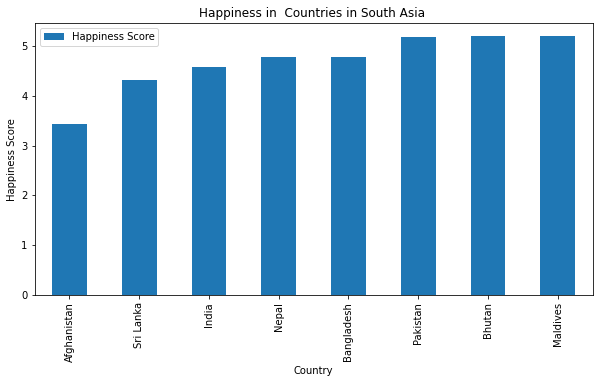

In [102]:
# Collapsing of data before creating graphs
collapsedhappy =final_merge.groupby(['country']).agg({'happy_score': 'mean'})

# Resetting the index so that the country does not become index and is ineligible for plotting grapgh
collapsedhappy = collapsedhappy.reset_index()

# Selecting the countries of South Asia to create the graph
selected_countries = ['Afghanistan', 'Nepal', 'Sri Lanka', 'India', 'Pakistan', 'Maldives', 'Bangladesh', 'Bhutan']
collapsedhappy = collapsedhappy[collapsedhappy['country'].isin(selected_countries)]

collapsedhappy  = collapsedhappy.set_index('country')

collapsedhappy.sort_values('happy_score',inplace=True) #may consider sth like this

# Plotting the mean of each indicator for each country using a bar chart
collapsedhappy.plot(kind='bar', figsize=(10, 5), legend=True)

# Adding a title and labels for the x and y axes
plt.title('Happiness in  Countries in South Asia ')
plt.xlabel('Country')
plt.ylabel('Happiness Score')

# Changing the legend labels
plt.legend(['Happiness Score'])

# Displaying the plot
plt.show()

On average, over the given time period in South Asia, Bhutan seems to be the happiest country followed by Maldives and Pakistan. The least happy country is Afghanistan, which makes sense in the light of countinued wars and control by religious fundamentalists.

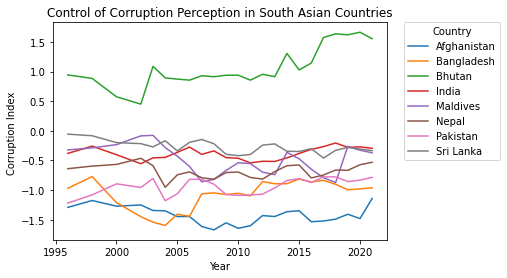

In [ ]:
# Testing the trend of corruption in South Asian countries over the given years
countries = ['Afghanistan', 'Nepal', 'Sri Lanka', 'India', 'Pakistan', 'Maldives', 'Bangladesh', 'Bhutan']
selected_count =final_merge[final_merge['country'].isin(countries)]

# Creating a line chart using seaborn's lineplot function for Corruption Control Indicator
sns.lineplot(x='year', y='corcontest', hue='country', data=selected_count)

# Adding a title and labels to the x and y axes
plt.title('Control of Corruption Perception in South Asian Countries')
plt.xlabel('Year')
plt.ylabel('Corruption Index ')

# Managing the legend
legend = plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0);

# Adjusting the size of the plot to make room for the legend
#plt.tight_layout();

**INTERPRETATION:**

From the chart, it appears that in the period between 1995 to 2021, the public perception of rampant corruption was the highest in Afghnistan at -1.7 in 1996, and the condition has not improved but worsened.Nevertheless, Bhutan is the country where people continue to experience the lowest level of corruption, and the perception has consistently improved, starting at 1.0 and ending in 1.5. For most the countries, there seems to be no positive change in transparency and accontability, and for some, the situation seems to have deteriorated.


The range of indicator is between -2.5 to +2.5, where -2.5 represents the highest level of corruption preception and +2.5 the lowest level of corruption perception. "Control of corruption captures perceptions of the extent to which public power is exercised for private gain, including both petty and
grand forms of corruption, as well as "capture" of the state by elites and private interests."

Source: <a href="https://info.worldbank.org/governance/wgi/Home/Documents"> World Governance Indicators </a>

Text(0.5, 1.0, 'World Governance Indicators for Countries in South Asia ')

Text(0.5, 0, 'Country')

Text(0, 0.5, 'Indicator Value')

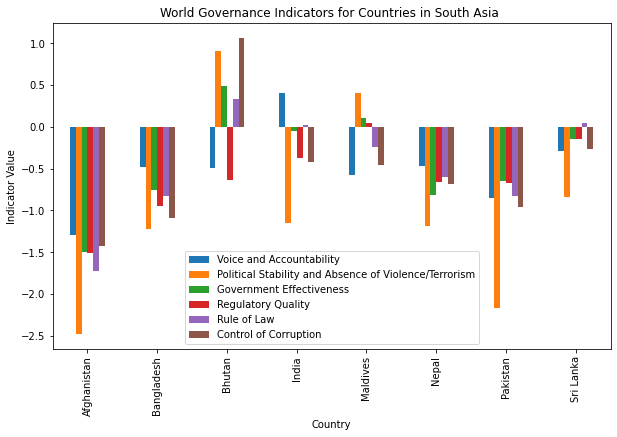

In [ ]:
# Collapsing of data before creating graphs
collapsedgov = final_merge.groupby(['country']).agg({'voacest': 'mean', 'polstabest': 'mean', 'goveffest' : 'mean', 'quaregest': 'mean', 'ruloflawest': 'mean', 'corcontest':	'mean'})

# Resetting the index so that the country does not become index and is ineligible for plotting grapgh
collapsedgov = collapsedgov.reset_index()

# Selecting the countries of South Asia to create the graph
selected_countries = ['Afghanistan', 'Nepal', 'Sri Lanka', 'India', 'Pakistan', 'Maldives', 'Bangladesh', 'Bhutan']
collapsedgov = collapsedgov[collapsedgov['country'].isin(selected_countries)]

collapsedgov  = collapsedgov.set_index('country')

# Plotting the mean of each indicator for each country using a bar chart
collapsedgov.plot(kind='bar', figsize=(10, 6), legend=True)

# Adding a title and labels for the x and y axes
plt.title('World Governance Indicators for Countries in South Asia ')
plt.xlabel('Country')
plt.ylabel('Indicator Value')

# Changing the legend labels
plt.legend(['Voice and Accountability', "Political Stability and Absence of Violence/Terrorism", 'Government Effectiveness', 'Regulatory Quality', 'Rule of Law', "Control of Corruption"])

# Displaying the plot
plt.show()

From the above graph, it appears that almost all countries in South Asia do not perform well on almost all indicators. The governance problem is the most stark in Afghanistan followed by Pakistan and Bangladesh. However, Bhutan has comparatively more impressive record on most of the indicators than other countries.

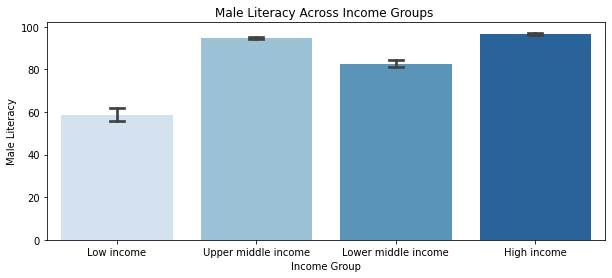

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(data=final_merge, y='malelit_%', x='Income group',palette="Blues",estimator=np.mean, ci=95, capsize=.1, orient='v',ax=ax);

plt.title('Male Literacy Across Income Groups ')
plt.xlabel('Income Group')
plt.ylabel('Male Literacy');


**Interpretation**

In the above barchart, it seems that percentage of male literacy is similar for high and upper middle countries. As expected, low income countries have lower male literacy rates.